
<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:##8ca7be;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">Elad Leibovitz - 031820459</h1>
    <h2 style="text-align:center;font-weight: bold;">ML - Titanic</h2>

</div>



<img src="https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg" />
 

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">1. Load The Data</h1>

</div>

!pip install pyarrow

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
import itertools

# !pip install missingno
import missingno as msno
#import pylib
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
from matplotlib.axes import Axes
from sklearn.feature_selection import VarianceThreshold ,RFE,RFECV , SelectFromModel
from collections import Counter
from sklearn.ensemble import  RandomForestClassifier ,ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV ,StratifiedKFold , cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder ,MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, plot_roc_curve,mean_squared_log_error, mean_absolute_error ,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier ,LocalOutlierFactor




## Variables definition:

- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat - Lifeboat (if survived)
- body - Body number (if did not survive and body was recovered)

In [2]:
# read parquet file

df_train = pd.read_parquet("C:/Users/Eladl/iCloudDrive/Data Sciene/DS-Git/Data Science GIT/DataScience/data/train.parquet", engine='pyarrow')
df_test  = pd.read_parquet("C:/Users/Eladl/iCloudDrive/Data Sciene/DS-Git/Data Science GIT/DataScience/data/test.parquet", engine='pyarrow')

In [3]:
df_train

age     boat  body    cabin  embarked     fare  \
199    -1        C    -1  Unknown         0  15.2458   
706    12        C    -1  Unknown         0  11.2417   
555    18  Unknown    -1  Unknown         2  13.0000   
382    37  Unknown    -1  Unknown         2   9.5875   
316    41  Unknown    -1  Unknown         2  39.6875   
...   ...      ...   ...      ...       ...      ...   
878    50       13    -1  Unknown         2  10.5000   
283     4        2    -1  Unknown         2  22.0250   
797    32  Unknown    -1  Unknown         2  10.5000   
1300   21  Unknown    -1  Unknown         2  11.5000   
225    -1       16    -1  Unknown         1   7.7375   

                                              home.dest  \
199                                             Unknown   
706                                             Unknown   
555                  Kontiolahti, Finland / Detroit, MI   
382                                             Unknown   
316                                             Unknown   
...                                                 ...   
878   London, England / Marietta, Ohio and Milwaukee...   
283                                             Unknown   
797                    St Ives, Cornwall / Houghton, MI   
1300                     Penzance, Cornwall / Akron, OH   
225                                             Unknown   

                                                   name  parch  pclass  sex  \
199   Moubarek, Master. Halim Gonios ('William George')      1       2    0   
706                        Nicola-Yarred, Master. Elias      0       2    0   
555                               Hiltunen, Miss. Marta      1       1    1   
382                      Laitinen, Miss. Kristina Sofia      0       2    1   
316              Panula, Mrs. Juha (Maria Emilia Ojala)      5       2    1   
...                                                 ...    ...     ...  ...   
878                                Ridsdale, Miss. Lucy      0       1    1   
283                 Kink-Heilmann, Miss. Luise Gretchen      2       2    1   
797                          Jenkin, Mr. Stephen Curnow      0       1    0   
1300                       Cotterill, Mr. Henry 'Harry'      0       1    0   
225                            Mannion, Miss. Margareth      0       2    1   

      sibsp  survived       ticket  
199       1         1         2661  
706       1         1         2651  
555       1         0       250650  
382       0         0         4135  
316       0         0      3101295  
...     ...       ...          ...  
878       0         1  W./C. 14258  
283       0         1       315153  
797       0         0   C.A. 33111  
1300      0         0        29107  
225       0         1        36866  

[1047 rows x 14 columns]


<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">2. Summarize the Dataset</h1>

</div>

In [4]:
df_train.shape  # we see that there are 1047. rows in df and 14 colums

(1047, 14)

## Categorical Variable
<ul>
<li>boat</li>
<li>cabin</li>
<li>home.dest</li>
<li>name</li>
<li>ticket</li>
</ul>

# Numerical Variable
<ul>
<li>age</li>
<li>body</li>
<li>embarked</li>
<li>fare</li>
<li>pclass</li>
<li>parch</li>
<li>sex</li>
<li>sibsp</li>
<li>survived</li>

### Notes:

The target variable,'survived', seems to be a numerical variable, althought it is categorical since this column only includes 1 and 0(survived or not survived). These kinds of variables have to be considered categorical.




<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">3. EDA and Data Cleansing</h1>

</div>

# shuffle the dataset
from sklearn.utils import shuffle
df_train = shuffle(df_train)

In [5]:
#information about dataset. Type of data, Non-Null data and names of columns.

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 199 to 225
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1047 non-null   int64  
 1   boat       1047 non-null   object 
 2   body       1047 non-null   int32  
 3   cabin      1047 non-null   object 
 4   embarked   1047 non-null   int64  
 5   fare       1047 non-null   float32
 6   home.dest  1047 non-null   object 
 7   name       1047 non-null   object 
 8   parch      1047 non-null   int32  
 9   pclass     1047 non-null   int64  
 10  sex        1047 non-null   int64  
 11  sibsp      1047 non-null   int32  
 12  survived   1047 non-null   int64  
 13  ticket     1047 non-null   object 
dtypes: float32(1), int32(3), int64(5), object(5)
memory usage: 106.3+ KB


In [6]:
# Change all values from -1 to nan as instructed 

for i in df_train.columns:
    df_train.loc[df_train[i] == -1, i] = np.nan
            

In [7]:
# Change all values from Unknown to nan as instructed 

for i in df_train.columns:
    df_train.loc[df_train[i] == 'Unknown', i] = np.nan
            

In [8]:
# Checking results

df_train.head()

age boat  body cabin  embarked     fare  \
199   NaN    C   NaN   NaN       0.0  15.2458   
706  12.0    C   NaN   NaN       0.0  11.2417   
555  18.0  NaN   NaN   NaN       2.0  13.0000   
382  37.0  NaN   NaN   NaN       2.0   9.5875   
316  41.0  NaN   NaN   NaN       2.0  39.6875   

                              home.dest  \
199                                 NaN   
706                                 NaN   
555  Kontiolahti, Finland / Detroit, MI   
382                                 NaN   
316                                 NaN   

                                                  name  parch  pclass  sex  \
199  Moubarek, Master. Halim Gonios ('William George')    1.0     2.0  0.0   
706                       Nicola-Yarred, Master. Elias    0.0     2.0  0.0   
555                              Hiltunen, Miss. Marta    1.0     1.0  1.0   
382                     Laitinen, Miss. Kristina Sofia    0.0     2.0  1.0   
316             Panula, Mrs. Juha (Maria Emilia Ojala)    5.0     2.0  1.0   

     sibsp  survived   ticket  
199    1.0       1.0     2661  
706    1.0       1.0     2651  
555    1.0       0.0   250650  
382    0.0       0.0     4135  
316    0.0       0.0  3101295

### Sweetviz report

In [9]:
import sweetviz as sv

#analyzing the dataset
advert_report = sv.analyze([df_train,'Train'],target_feat='survived',pairwise_analysis='off')
#display the report
advert_report.show_html('df_train.html')

                                             |                                                                …

Report df_train.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
# extract titles from "title" feature

df_train['title'] = df_train['name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0]



In [11]:
df_train['title'].value_counts()

 Mr              606
 Miss            218
 Mrs             146
 Master           50
 Rev               8
 Dr                7
 Col               4
 Ms                2
 the Countess      1
 Capt              1
 Sir               1
 Mlle              1
 Mme               1
 Don               1
Name: title, dtype: int64

### Most freqment items are Mr ,Miss, Mrs  & Master

In [12]:
df_train['title'].unique()

array([' Master', ' Miss', ' Mrs', ' Mr', ' Ms', ' Rev', ' Mme', ' Dr',
       ' Col', ' Don', ' Capt', ' Sir', ' the Countess', ' Mlle'],
      dtype=object)

In [13]:
# Checking embarked.value_counts

df_train['embarked'].value_counts()  

2.0    740
0.0    207
1.0     98
3.0      2
Name: embarked, dtype: int64

### most of the peapole embarked from Southampton - embark 2 and only 2 in embark 3 (i guess the good one..)

In [14]:
# Creating a df from numerical variables

df_train_numer = df_train[['age','fare','survived']].copy()

In [15]:
# Creating a df from categorial variables

df_train_categ = df_train[['boat','cabin','home.dest','name','ticket','pclass','sibsp','sex','parch','embarked','survived']].copy()

In [16]:
df_train.head()

age boat  body cabin  embarked     fare  \
199   NaN    C   NaN   NaN       0.0  15.2458   
706  12.0    C   NaN   NaN       0.0  11.2417   
555  18.0  NaN   NaN   NaN       2.0  13.0000   
382  37.0  NaN   NaN   NaN       2.0   9.5875   
316  41.0  NaN   NaN   NaN       2.0  39.6875   

                              home.dest  \
199                                 NaN   
706                                 NaN   
555  Kontiolahti, Finland / Detroit, MI   
382                                 NaN   
316                                 NaN   

                                                  name  parch  pclass  sex  \
199  Moubarek, Master. Halim Gonios ('William George')    1.0     2.0  0.0   
706                       Nicola-Yarred, Master. Elias    0.0     2.0  0.0   
555                              Hiltunen, Miss. Marta    1.0     1.0  1.0   
382                     Laitinen, Miss. Kristina Sofia    0.0     2.0  1.0   
316             Panula, Mrs. Juha (Maria Emilia Ojala)    5.0     2.0  1.0   

     sibsp  survived   ticket    title  
199    1.0       1.0     2661   Master  
706    1.0       1.0     2651   Master  
555    1.0       0.0   250650     Miss  
382    0.0       0.0     4135     Miss  
316    0.0       0.0  3101295      Mrs

### 3.3 Descriptive Statistics

In [17]:
# Statistical information

df_train.describe(include="all")

age boat        body cabin     embarked         fare  \
count   843.000000  392   94.000000   227  1047.000000  1046.000000   
unique         NaN   26         NaN   154          NaN          NaN   
top            NaN   15         NaN    F4          NaN          NaN   
freq           NaN   34         NaN     4          NaN          NaN   
mean     29.603796  NaN  158.500000   NaN     1.512894    31.682705   
std      14.587587  NaN   97.217056   NaN     0.806034    47.511089   
min       0.000000  NaN    1.000000   NaN     0.000000     0.000000   
25%      21.000000  NaN   76.000000   NaN     1.000000     7.895800   
50%      28.000000  NaN  148.500000   NaN     2.000000    14.427099   
75%      38.000000  NaN  253.500000   NaN     2.000000    30.500000   
max      80.000000  NaN  328.000000   NaN     3.000000   512.329224   

           home.dest              name        parch       pclass          sex  \
count            604              1047  1047.000000  1047.000000  1047.000000   
unique           333              1045          NaN          NaN          NaN   
top     New York, NY  Kelly, Mr. James          NaN          NaN          NaN   
freq              54                 2          NaN          NaN          NaN   
mean             NaN               NaN     0.366762     1.303725     0.353391   
std              NaN               NaN     0.814052     0.832775     0.478251   
min              NaN               NaN     0.000000     0.000000     0.000000   
25%              NaN               NaN     0.000000     1.000000     0.000000   
50%              NaN               NaN     0.000000     2.000000     0.000000   
75%              NaN               NaN     0.000000     2.000000     1.000000   
max              NaN               NaN     9.000000     2.000000     1.000000   

              sibsp     survived    ticket title  
count   1047.000000  1047.000000      1047  1047  
unique          NaN          NaN       788    14  
top             NaN          NaN  CA. 2343    Mr  
freq            NaN          NaN         9   606  
mean       0.511939     0.382999       NaN   NaN  
std        1.071801     0.486350       NaN   NaN  
min        0.000000     0.000000       NaN   NaN  
25%        0.000000     0.000000       NaN   NaN  
50%        0.000000     0.000000       NaN   NaN  
75%        1.000000     1.000000       NaN   NaN  
max        8.000000     1.000000       NaN   NaN

In [18]:
# Checking null values in df

df_train.isnull().sum()

age          204
boat         655
body         953
cabin        820
embarked       0
fare           1
home.dest    443
name           0
parch          0
pclass         0
sex            0
sibsp          0
survived       0
ticket         0
title          0
dtype: int64

### There are many missing values in "cabin","home.dest" , "body" ,"age" and "boat". i will check this in the missingness section.

In [19]:
# Checking unique values for each columne (feature)

df_train.nunique()

age            73
boat           26
body           94
cabin         154
embarked        4
fare          263
home.dest     333
name         1045
parch           7
pclass          3
sex             2
sibsp           7
survived        2
ticket        788
title          14
dtype: int64

In [20]:
# Checknig outcome variable counts

df_train['survived'].value_counts()

0.0    646
1.0    401
Name: survived, dtype: int64

In [21]:
# Cheking ratio of outcome variable 

(df_train.survived.value_counts() / len(df_train))*100

0.0    61.700096
1.0    38.299904
Name: survived, dtype: float64

### we see the the outcome feature is balanced and less people survived - 401 (~38%)

In [22]:
# Checking gender values

df_train['sex'].value_counts()

0.0    677
1.0    370
Name: sex, dtype: int64

### if i look at the df, i see that 0- Man , 1- woman

In [23]:
# Checking numerical features

df_train_numer.head()

age     fare  survived
199   NaN  15.2458       1.0
706  12.0  11.2417       1.0
555  18.0  13.0000       0.0
382  37.0   9.5875       0.0
316  41.0  39.6875       0.0

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fare'}>,
        <AxesSubplot:title={'center':'survived'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

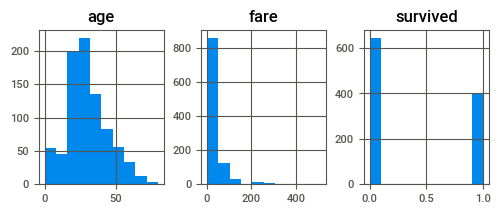

In [24]:
# Ploting the numerical features

df_train_numer.hist(figsize=(10,10),layout=(4,5))


### we can see that:
- age feature, 20 and 30 are most common values (avarge-29 , median - 28)
- fare - less than 14

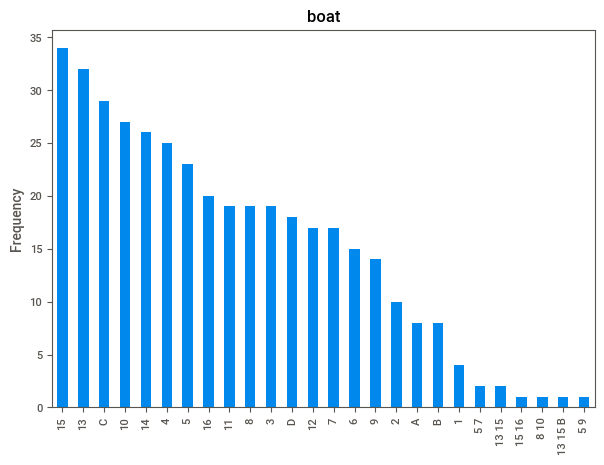

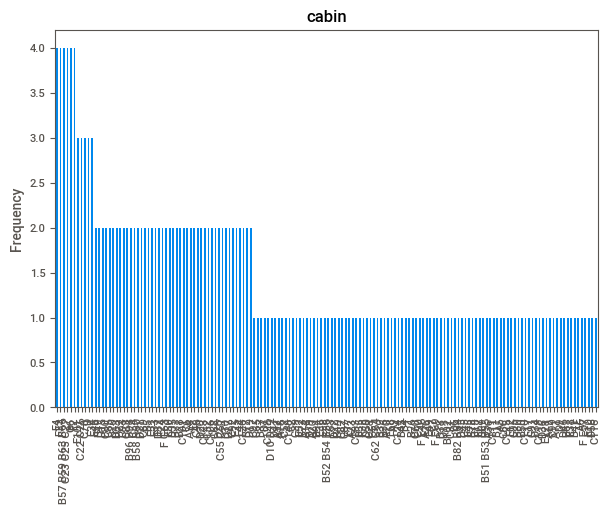

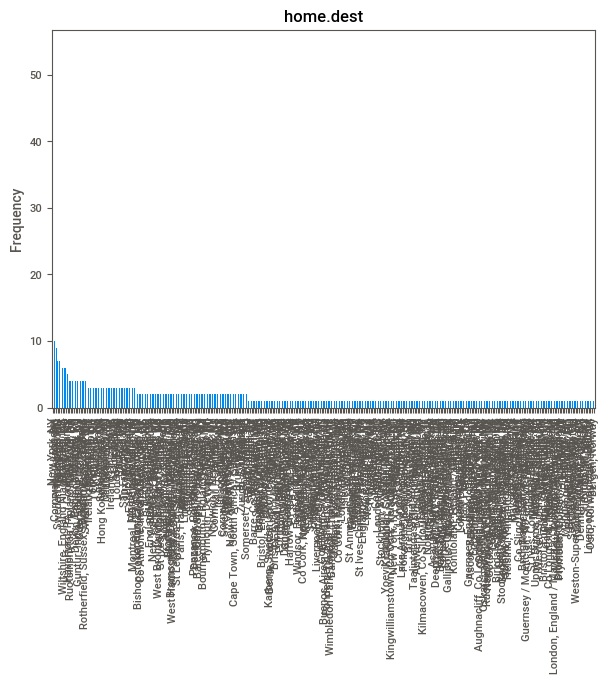

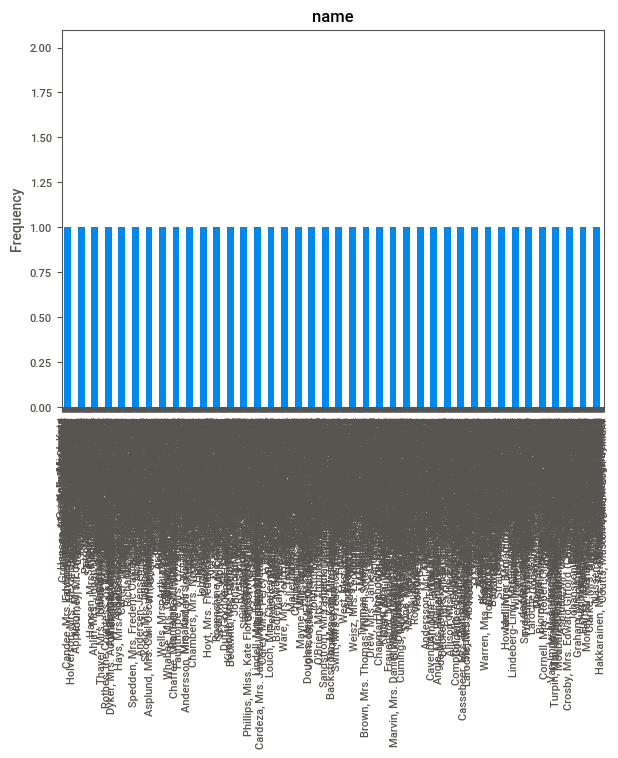

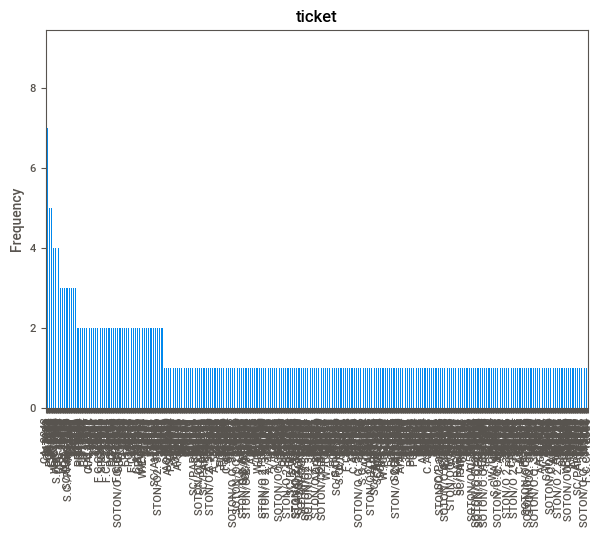

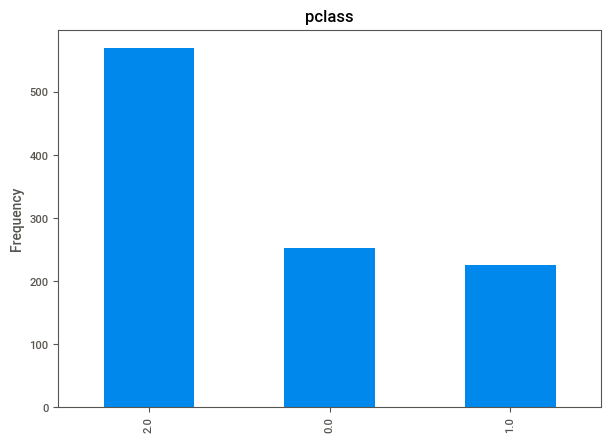

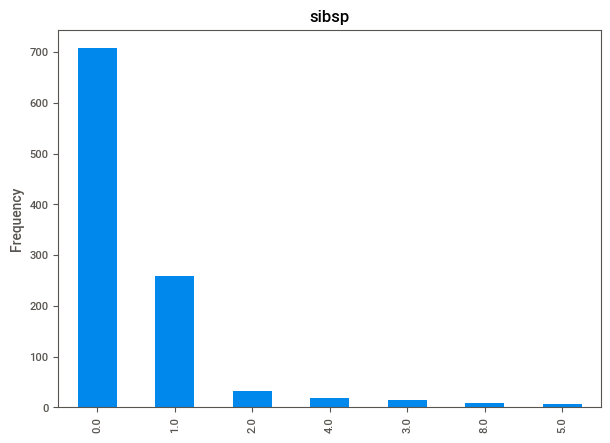

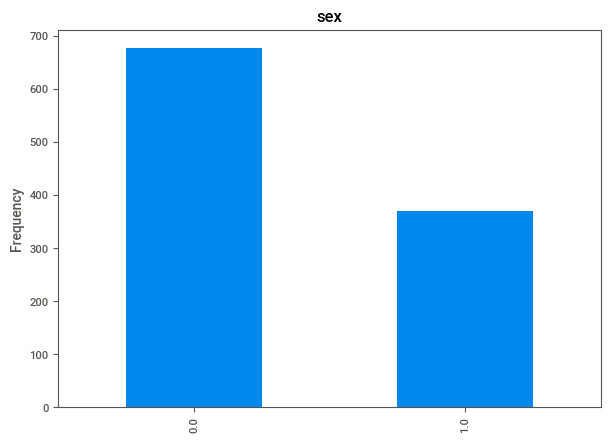

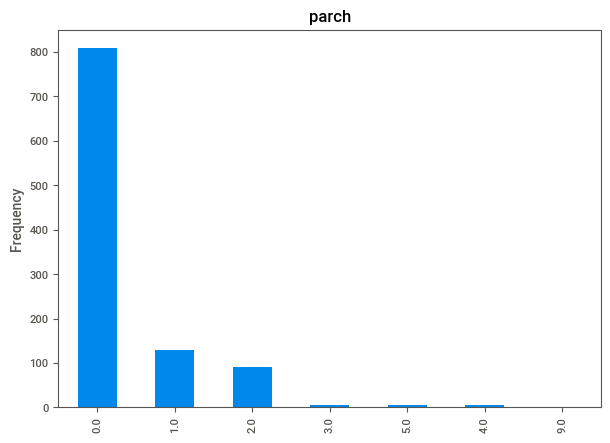

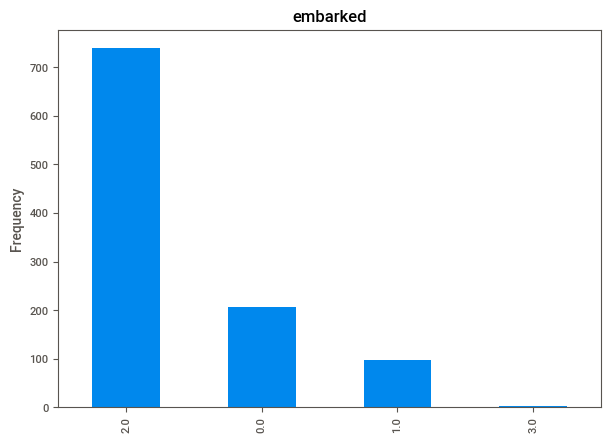

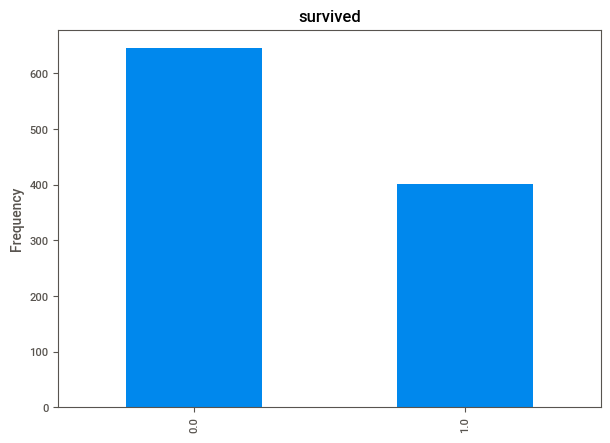

In [25]:
# ploting categorial variables

for i in df_train_categ:
    plt.figure(figsize = (7,5))
    df_train[i].value_counts().plot(kind='bar')
    plt.ylabel("Frequency")
    plt.title(i)
    plt.show()

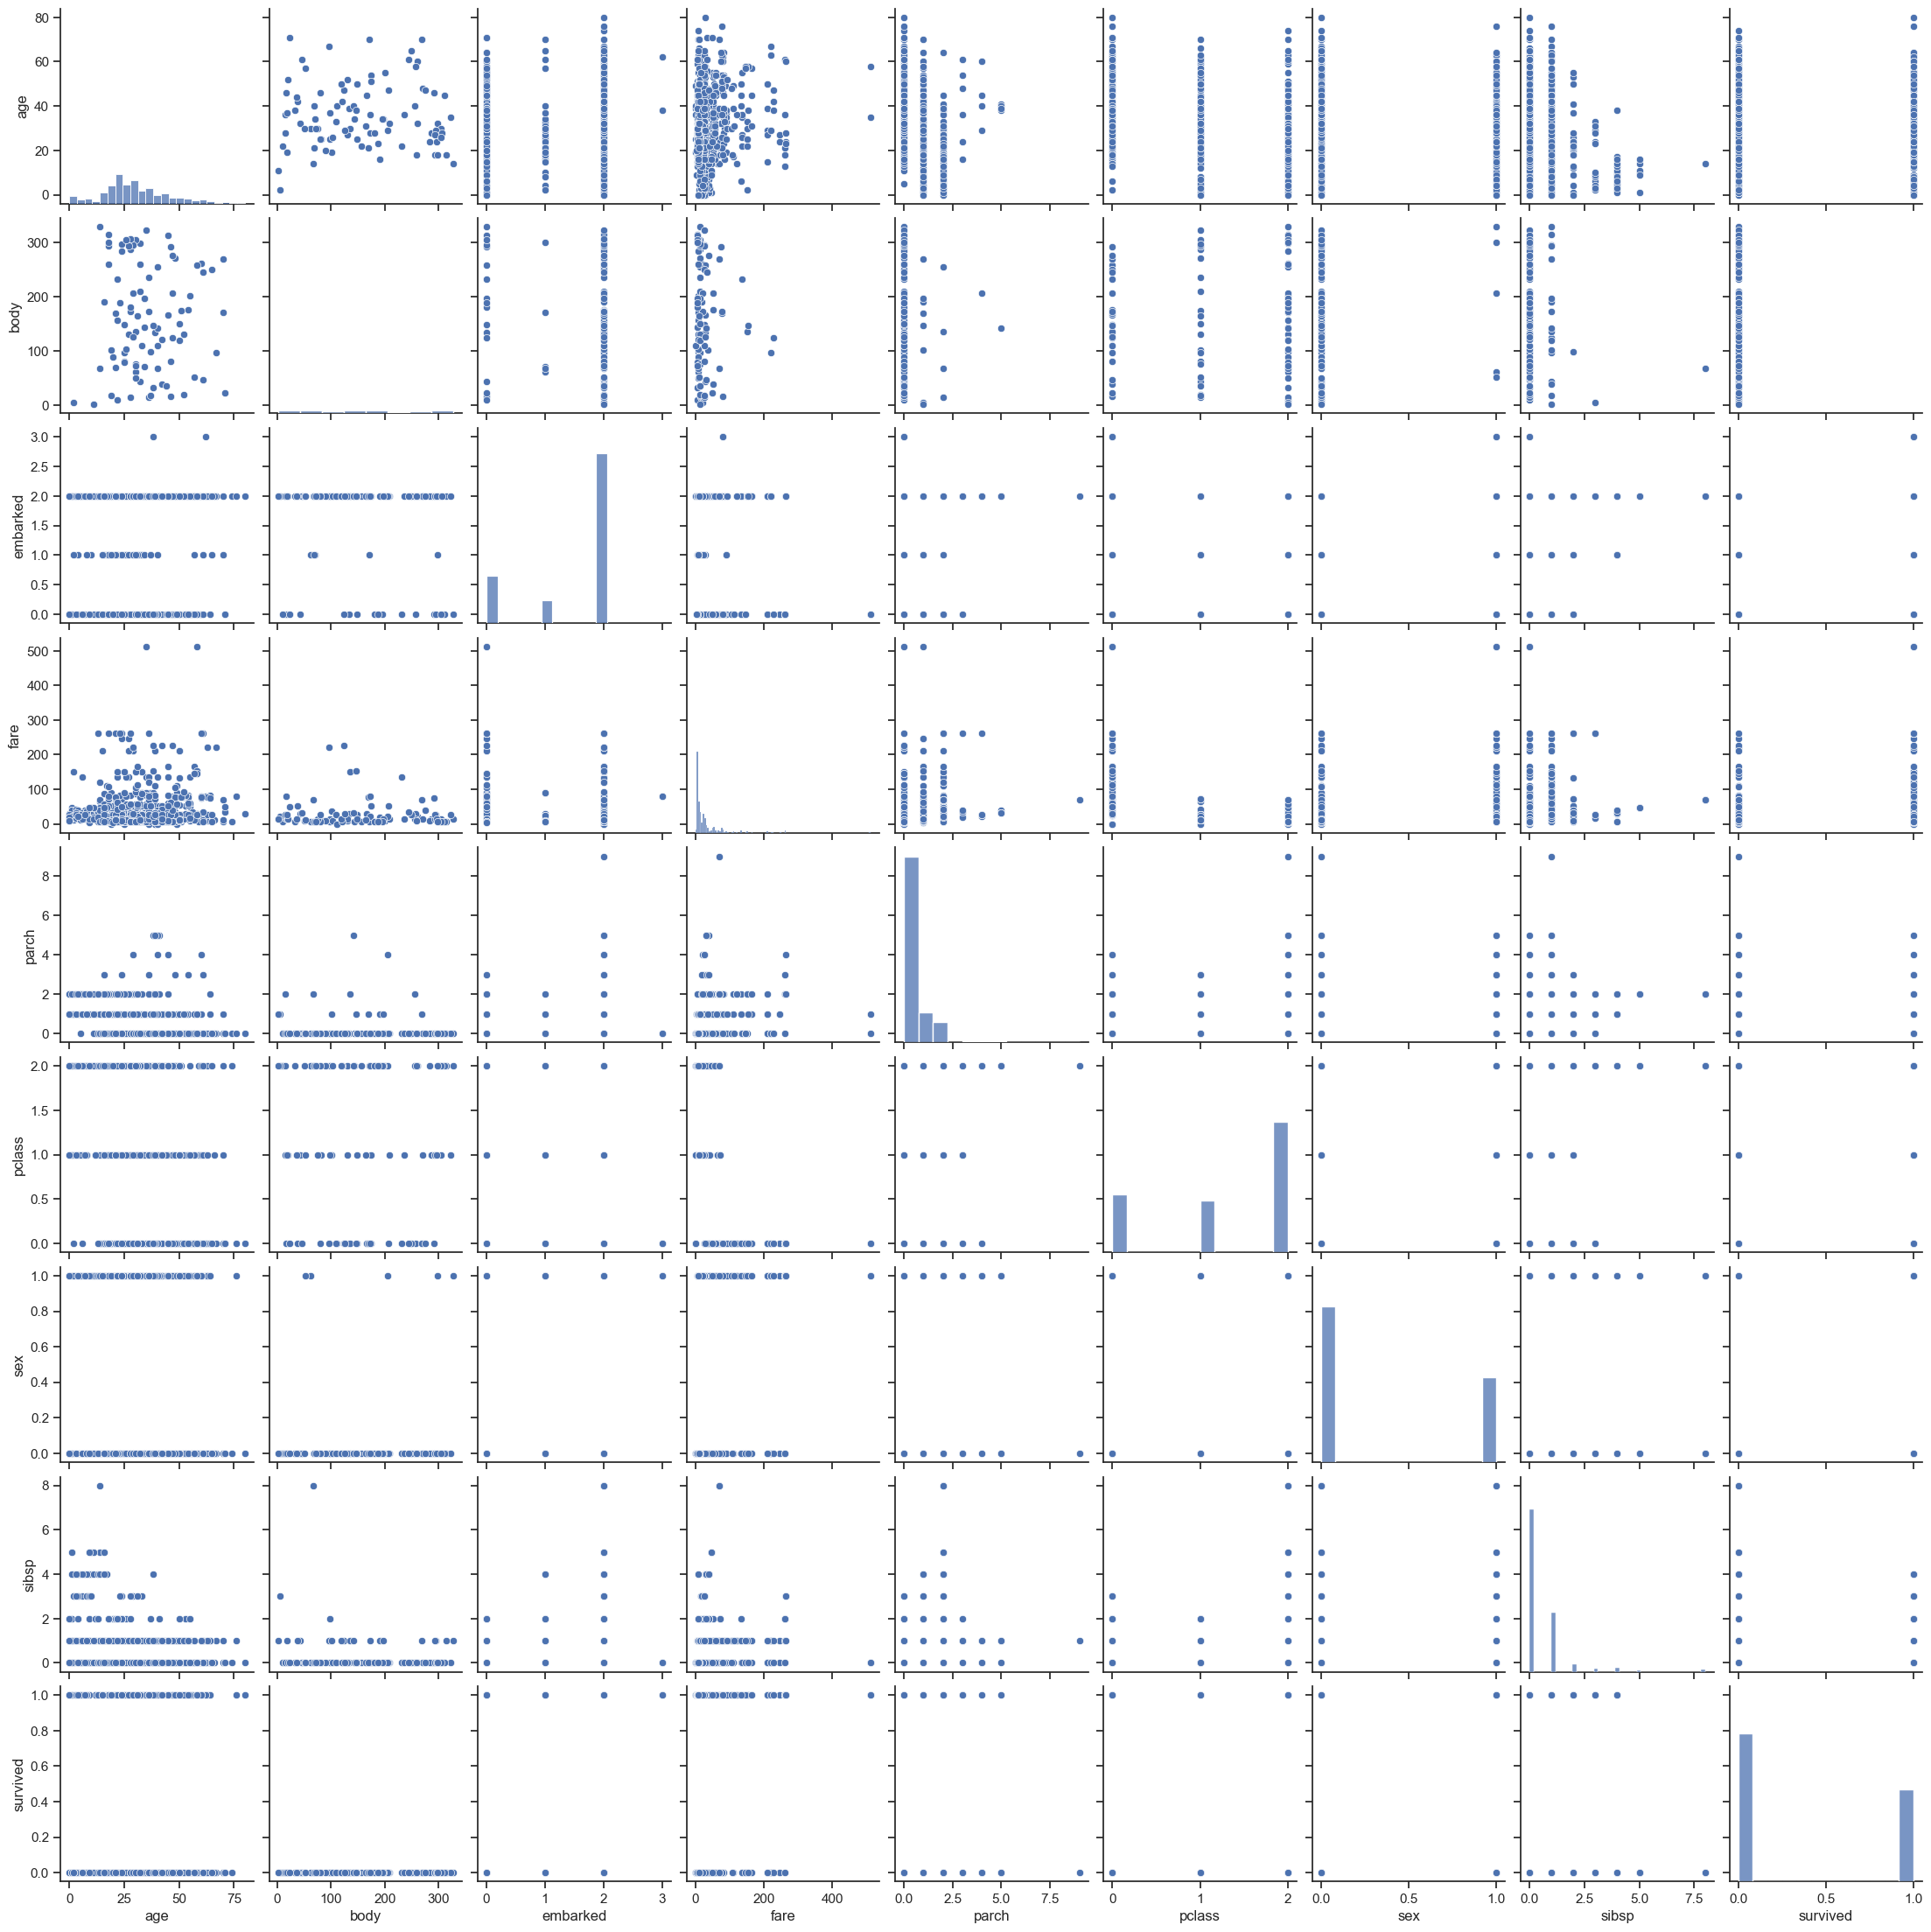

In [26]:
# plotting df as pairs

sns.set(style="ticks", color_codes=True)
sns.pairplot(df_train)

In [27]:
# Select only the categorical columns

df_cat = df_train.select_dtypes(include=['object'])
df_cat


boat cabin                                          home.dest  \
199     C   NaN                                                NaN   
706     C   NaN                                                NaN   
555   NaN   NaN                 Kontiolahti, Finland / Detroit, MI   
382   NaN   NaN                                                NaN   
316   NaN   NaN                                                NaN   
...   ...   ...                                                ...   
878    13   NaN  London, England / Marietta, Ohio and Milwaukee...   
283     2   NaN                                                NaN   
797   NaN   NaN                   St Ives, Cornwall / Houghton, MI   
1300  NaN   NaN                     Penzance, Cornwall / Akron, OH   
225    16   NaN                                                NaN   

                                                   name       ticket    title  
199   Moubarek, Master. Halim Gonios ('William George')         2661   Master  
706                        Nicola-Yarred, Master. Elias         2651   Master  
555                               Hiltunen, Miss. Marta       250650     Miss  
382                      Laitinen, Miss. Kristina Sofia         4135     Miss  
316              Panula, Mrs. Juha (Maria Emilia Ojala)      3101295      Mrs  
...                                                 ...          ...      ...  
878                                Ridsdale, Miss. Lucy  W./C. 14258     Miss  
283                 Kink-Heilmann, Miss. Luise Gretchen       315153     Miss  
797                          Jenkin, Mr. Stephen Curnow   C.A. 33111       Mr  
1300                       Cotterill, Mr. Henry 'Harry'        29107       Mr  
225                            Mannion, Miss. Margareth        36866     Miss  

[1047 rows x 6 columns]

<AxesSubplot:xlabel='survived', ylabel='count'>

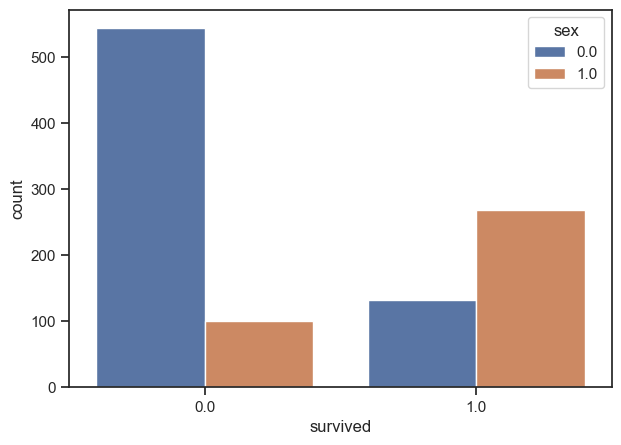

In [28]:
# Create a figure with 2 rows and 3 columns of subplots
plt.figure(figsize= (7,5))

sns.countplot(x='survived', data=df_train,hue='sex')

### We can see that most of the man didnt survived (81%)and if you are a woman, you have good chance to survived (73%)

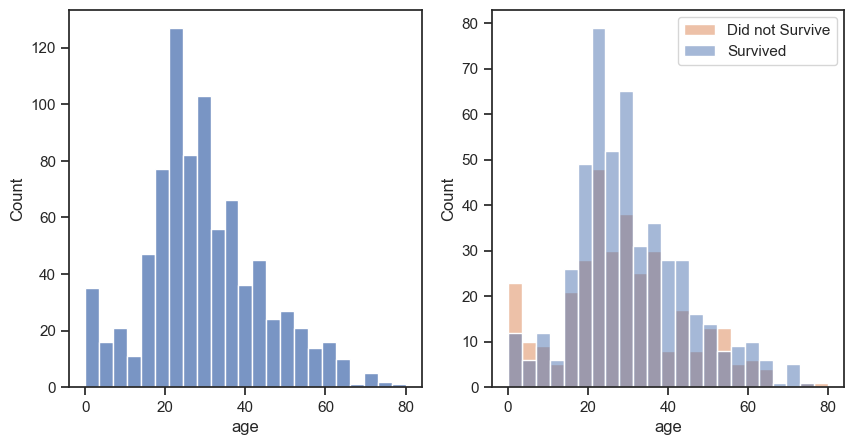

In [29]:
# Checking 'age' Vs 'survived'

plt.style.use('seaborn-ticks')
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot(x='age',data=df_train,ax=ax[0])
sns.histplot(x='age',hue='survived',data=df_train,ax=ax[1])
ax[1].legend(labels=['Did not Survive','Survived'],frameon=True)

### We can see that the smaller kids didnt survived 
### between ~5 - ~9 there is a good chance to survived
### the older man survived

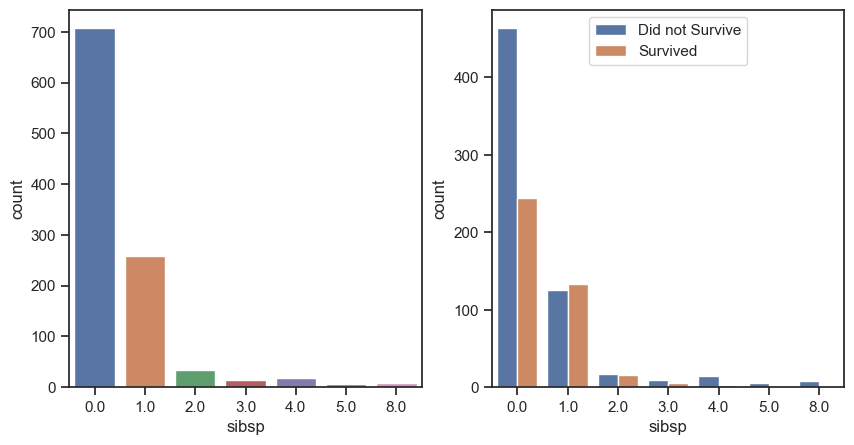

In [30]:
# Plotting sibsp feature

plt.style.use('seaborn-ticks')
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='sibsp',data=df_train,ax=ax[0])
sns.countplot(x='sibsp',hue='survived',data=df_train,ax=ax[1])
ax[1].legend(labels=['Did not Survive','Survived'],frameon=True)

## People from sibsp 1 or 2 - had more chance to survived : 51% , 48%)

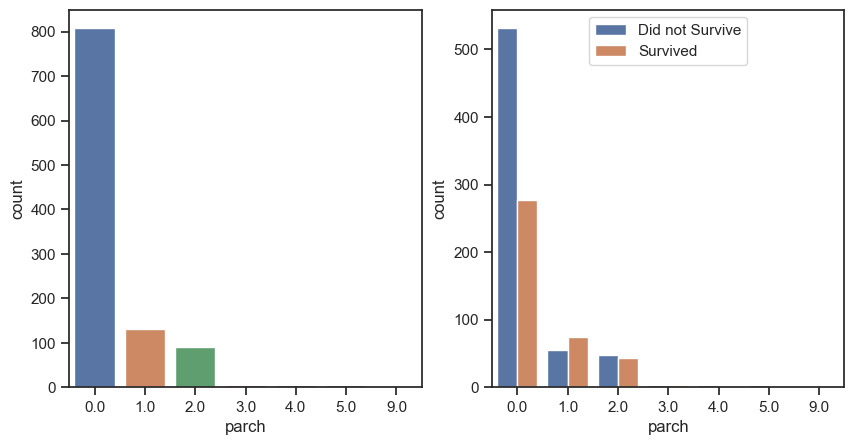

In [31]:
# Plotting parch feature

plt.style.use('seaborn-ticks')
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='parch',data=df_train,ax=ax[0])
sns.countplot(x='parch',hue='survived',data=df_train,ax=ax[1])
ax[1].legend(labels=['Did not Survive','Survived'],frameon=True)

## People from parch 1- had more chance to survived - ~58% and for parches 2 and 3 - ~50%

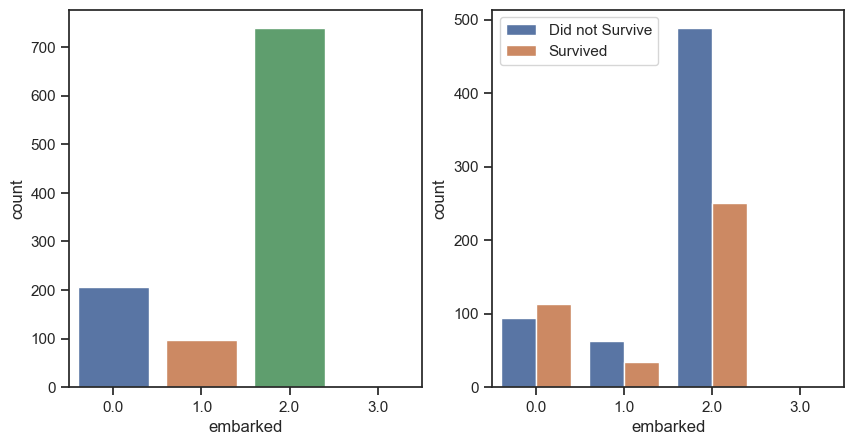

In [32]:
# Plotting embarked feature

plt.style.use('seaborn-ticks')
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='embarked',data=df_train,ax=ax[0])
sns.countplot(x='embarked',hue='survived',data=df_train,ax=ax[1])
ax[1].legend(labels=['Did not Survive','Survived'],frameon=True)

## People from embarked 0 - had more chance to survived (55%) and from embark 3 (2 people) has a chance 0f 100%

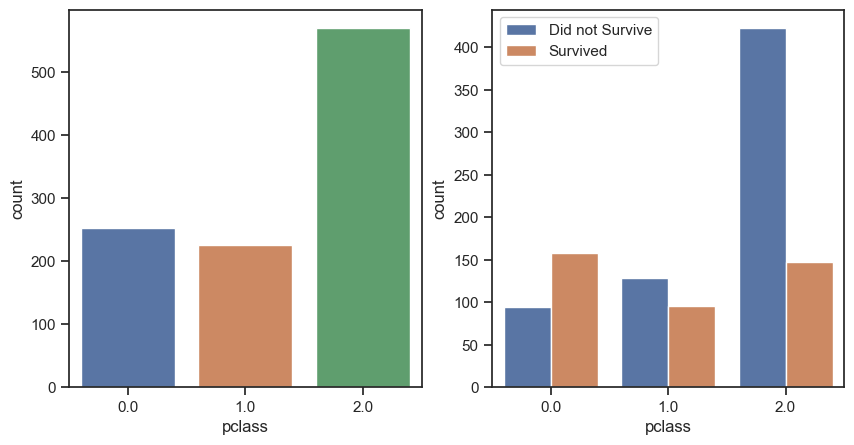

In [33]:
plt.style.use('seaborn-ticks')
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='pclass',data=df_train,ax=ax[0])
sns.countplot(x='pclass',hue='survived',data=df_train,ax=ax[1])
ax[1].legend(labels=['Did not Survive','Survived'],frameon=True)

### People from pclass 0 - had more chance to survived (63%)

<AxesSubplot:xlabel='fare', ylabel='Count'>

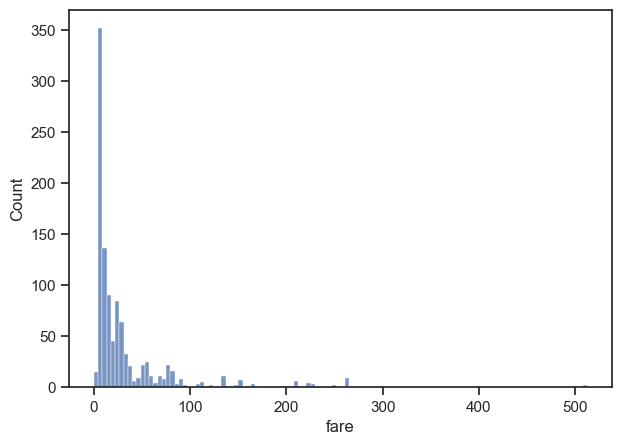

In [34]:
# Checking fare fearue
plt.figure(figsize= (7,5))

sns.histplot(x='fare',data=df_train)

In [35]:
# Checking df correlation

dfc = df_train.corr()

<AxesSubplot:>

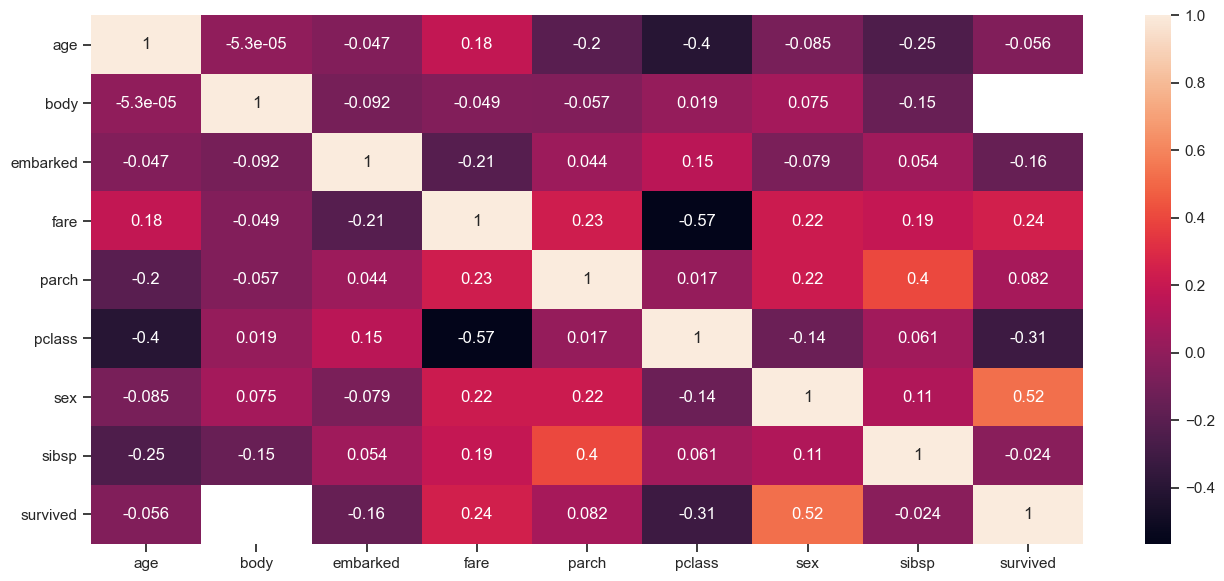

In [36]:
plt.figure(figsize= (16,7))
sns.heatmap(dfc,annot=True)

- I see that survived is correlate with sex (0.52), pclass(0.31),fare(0.24), embarked(-0.16)



<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">Analyse outliers and missing values</h1>

</div


### 6.1.1    Analize Missing values and unique values

In [37]:
# Function to show missing and unique values in data frame

def analize(df):
    # Creates new df
    analysis = pd.DataFrame(df.dtypes,columns=['d_types'])
    analysis = analysis.reset_index()
    analysis = analysis.rename(columns={"index": "Col_name"})
    #Adding missing values per feature
    analysis['Missing_values'] = df.isnull().sum().values
    #Adding Unique_values per feature
    analysis['Unique_values'] = df.nunique().values
    return analysis

In [38]:
# Sending the df to the function

analize(df_train)

Col_name  d_types  Missing_values  Unique_values
0         age  float64             204             73
1        boat   object             655             26
2        body  float64             953             94
3       cabin   object             820            154
4    embarked  float64               0              4
5        fare  float32               1            263
6   home.dest   object             443            333
7        name   object               0           1045
8       parch  float64               0              7
9      pclass  float64               0              3
10        sex  float64               0              2
11      sibsp  float64               0              7
12   survived  float64               0              2
13     ticket   object               0            788
14      title   object               0             14

In [39]:
# Columns mith missing valius count

df_train.isnull().sum(axis = 0).sort_values(ascending=False)

body         953
cabin        820
boat         655
home.dest    443
age          204
fare           1
embarked       0
name           0
parch          0
pclass         0
sex            0
sibsp          0
survived       0
ticket         0
title          0
dtype: int64

### There are many missing values in "cabin","home.dest" , "body" ,"age" and "boat". i will handlw them in the Treatment section

In [40]:
# Percentage of missing values in df

s2 = df_train.isna().mean().sort_values(ascending=False)
print (s2)

body         0.910220
cabin        0.783190
boat         0.625597
home.dest    0.423114
age          0.194842
fare         0.000955
embarked     0.000000
name         0.000000
parch        0.000000
pclass       0.000000
sex          0.000000
sibsp        0.000000
survived     0.000000
ticket       0.000000
title        0.000000
dtype: float64


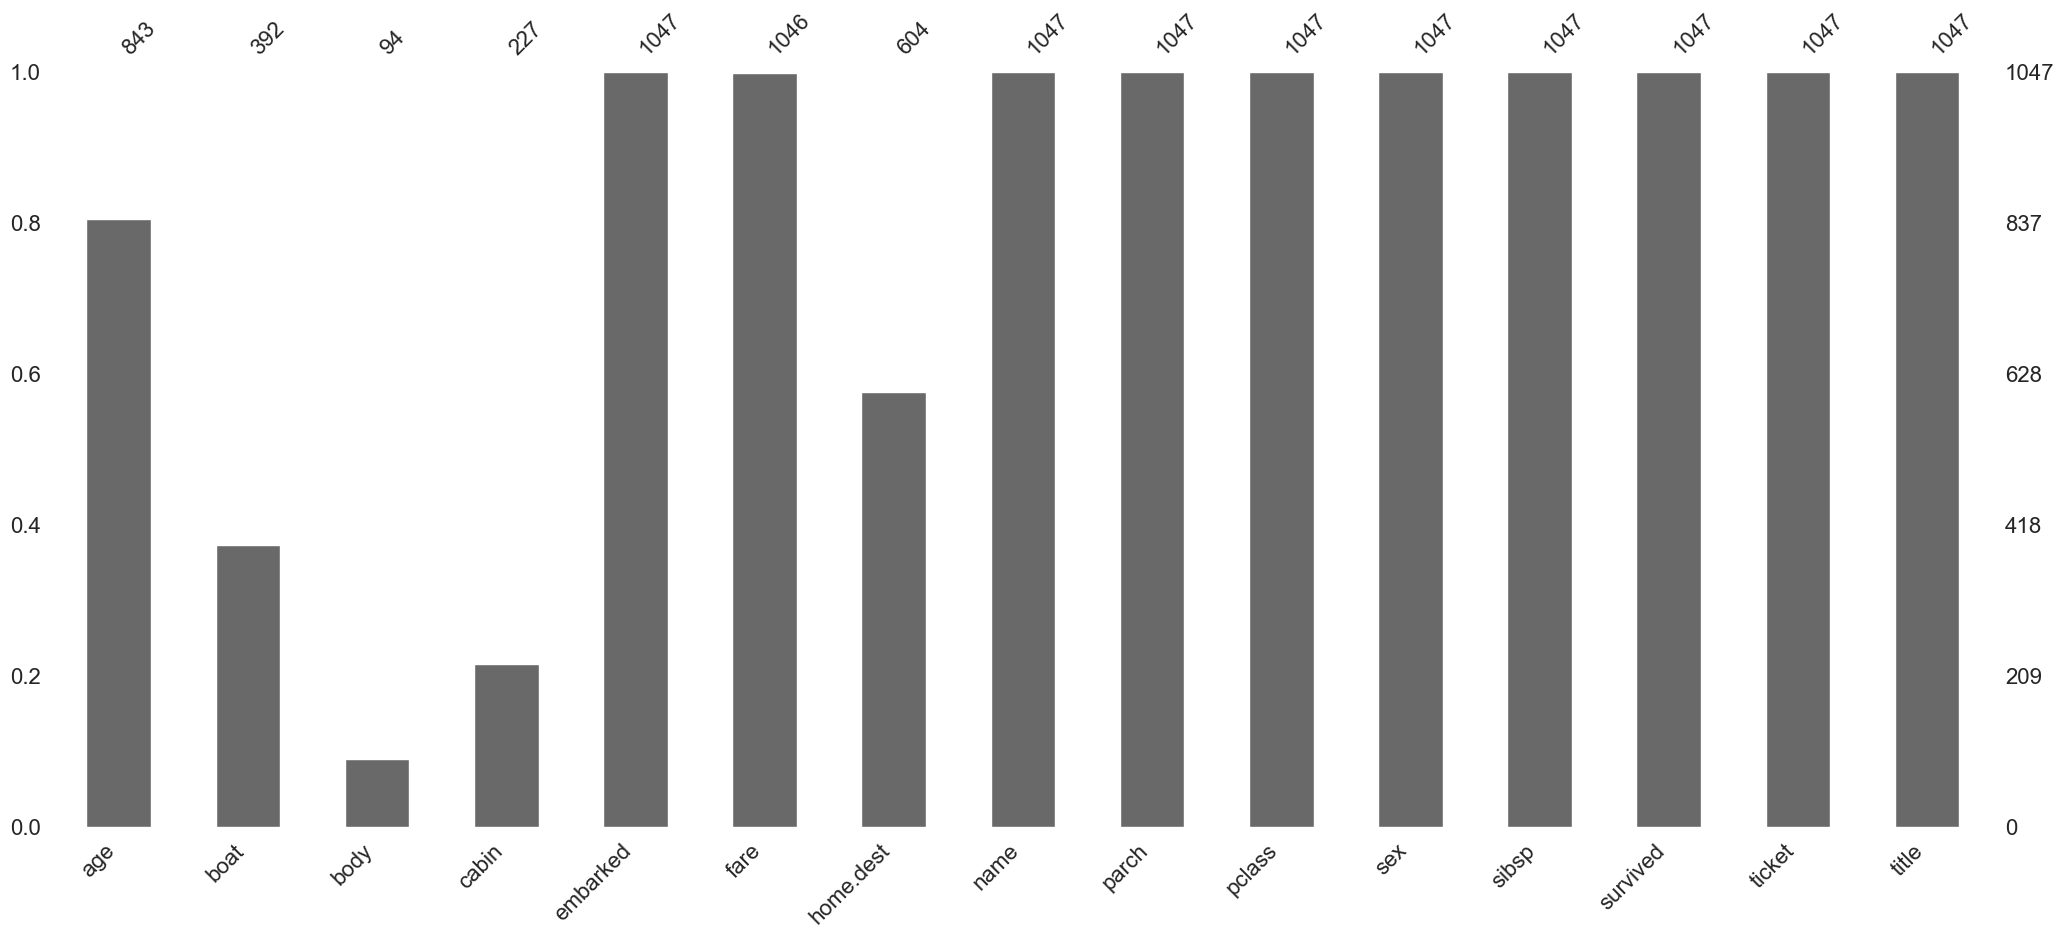

In [41]:
# For missing values, there a library named "missingno", which was imported at the beginning. This library provides visual analysis for missing values
plt.figure(figsize= (8,7))

msno.bar(df_train)
plt.show()

Text(0.5, 1.0, 'Missing Values')

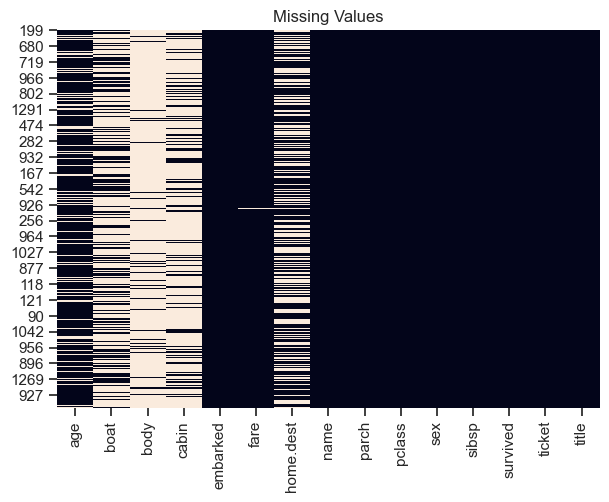

In [42]:
plt.figure(figsize= (7,5))

sns.heatmap(df_train.isna(),cbar=False)
plt.title('Missing Values')


<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:left;font-weight: bold;">Outliers</h1>

</div>

In [43]:
#outlier_thresholds -defining Q3 and Q1 as 75th and 25t

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [44]:
# Observe age outliers

low, up = outlier_thresholds(df_train, "age")
print(low,up)


-4.5 63.5


In [45]:
# chacking age outliers rows

df_train[((df_train["age"] < low) | (df_train["age"] > up))]

age boat   body    cabin  embarked        fare  \
532   64.0   14    NaN      E45       0.0   83.158302   
781   67.0  NaN   96.0  C55 C57       2.0  221.779205   
129   74.0  NaN    NaN      NaN       2.0    7.775000   
391   70.0  NaN  171.0      NaN       1.0    7.750000   
230   80.0    B    NaN      A23       2.0   30.000000   
975   76.0    6    NaN      C46       2.0   78.849998   
997   64.0  NaN    NaN      D37       0.0   75.250000   
1078  64.0    7    NaN      B26       2.0   26.549999   
64    70.0  NaN  269.0      B22       2.0   71.000000   
568   66.0  NaN    NaN      NaN       2.0   10.500000   
890   70.0  NaN    NaN      NaN       2.0   10.500000   
36    71.0  NaN    NaN       A5       0.0   34.654202   
284   65.0  NaN  249.0      E38       2.0   26.549999   
1015  65.0  NaN    NaN      NaN       1.0    7.750000   
1072  71.0  NaN   22.0      NaN       0.0   49.504200   

                                         home.dest  \
532                                   Lakewood, NJ   
781                                   New York, NY   
129                                            NaN   
391                                            NaN   
230                                  Hessle, Yorks   
975                        Little Onn Hall, Staffs   
997                                   Portland, OR   
1078                                 Milwaukee, WI   
64                                   Milwaukee, WI   
568               Guernsey, England / Edgewood, RI   
890   Guernsey / Montclair, NJ and/or Toledo, Ohio   
36                                    New York, NY   
284                           East Bridgewater, MA   
1015                                           NaN   
1072                           Montevideo, Uruguay   

                                                   name  parch  pclass  sex  \
532   Compton, Mrs. Alexander Taylor (Mary Eliza Ing...    2.0     0.0  1.0   
781                                  Straus, Mr. Isidor    0.0     0.0  0.0   
129                                 Svensson, Mr. Johan    0.0     2.0  0.0   
391                                Connors, Mr. Patrick    0.0     2.0  0.0   
230                Barkworth, Mr. Algernon Henry Wilson    0.0     0.0  0.0   
975   Cavendish, Mrs. Tyrell William (Julia Florence...    0.0     0.0  1.0   
997                            Warren, Mr. Frank Manley    0.0     0.0  0.0   
1078  Crosby, Mrs. Edward Gifford (Catherine Elizabe...    1.0     0.0  1.0   
64                         Crosby, Capt. Edward Gifford    1.0     0.0  0.0   
568                               Wheadon, Mr. Edward H    0.0     1.0  0.0   
890                         Mitchell, Mr. Henry Michael    0.0     1.0  0.0   
36                            Goldschmidt, Mr. George B    0.0     0.0  0.0   
284                           Millet, Mr. Francis Davis    0.0     0.0  0.0   
1015                                   Duane, Mr. Frank    0.0     2.0  0.0   
1072                            Artagaveytia, Mr. Ramon    0.0     0.0  0.0   

      sibsp  survived      ticket  title  
532     0.0       1.0    PC 17756    Mrs  
781     1.0       0.0    PC 17483     Mr  
129     0.0       0.0      347060     Mr  
391     0.0       0.0      370369     Mr  
230     0.0       1.0       27042     Mr  
975     1.0       1.0       19877    Mrs  
997     1.0       0.0      110813     Mr  
1078    1.0       1.0      112901    Mrs  
64      1.0       0.0   WE/P 5735   Capt  
568     0.0       0.0  C.A. 24579     Mr  
890     0.0       0.0  C.A. 24580     Mr  
36      0.0       0.0    PC 17754     Mr  
284     0.0       0.0       13509     Mr  
1015    0.0       0.0      336439     Mr  
1072    0.0       0.0    PC 17609     Mr


<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">Pre-processing-Solve Outliers and Missing Values</h1>

</div>

In [46]:
# a function to show missing values and ratios

def missing_values_table(dataframe, na_name=False):
    # only take missing columns
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)  # number of missing value
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False) # ratio
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])  # make table
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [47]:
# columns that includes missing values and the ratio

na_cols = missing_values_table(df_train, na_name=True)

           n_miss  ratio
body          953  91.02
cabin         820  78.32
boat          655  62.56
home.dest     443  42.31
age           204  19.48
fare            1   0.10


###  I will remove the missing colmns with more than 40% (body, cabin, boat, home.dest)


In [48]:
# Checking the missingness row in fare featur3

nan_rows_fare = df_train[df_train['fare'].isna()]
nan_rows_fare

age boat   body cabin  embarked  fare home.dest                name  \
484  60.0  NaN  261.0   NaN       2.0   NaN       NaN  Storey, Mr. Thomas   

     parch  pclass  sex  sibsp  survived ticket title  
484    0.0     2.0  0.0    0.0       0.0   3701    Mr

In [49]:
# i removed the na row because it is not importent and he didnt survived

df_train = df_train[df_train['fare'].notna()]

### I will also remove unimportent columns

In [50]:
cols = ['body', 'cabin', 'boat', 'home.dest','name','ticket']
df_train = df_train.drop(cols , axis=1)

In [51]:
df_train.head()

age  embarked     fare  parch  pclass  sex  sibsp  survived    title
199   NaN       0.0  15.2458    1.0     2.0  0.0    1.0       1.0   Master
706  12.0       0.0  11.2417    0.0     2.0  0.0    1.0       1.0   Master
555  18.0       2.0  13.0000    1.0     1.0  1.0    1.0       0.0     Miss
382  37.0       2.0   9.5875    0.0     2.0  1.0    0.0       0.0     Miss
316  41.0       2.0  39.6875    5.0     2.0  1.0    0.0       0.0      Mrs

In [52]:
# columns that includes missing values

na_cols = missing_values_table(df_train, na_name=True) #


     n_miss  ratio
age     204   19.5


###  filling missing values in 'age' feature with knn imputation

In [53]:
# filling missing values in 'age' feature with knn imputation

from sklearn.impute import KNNImputer

print("Data Before performing imputation\n",df_train[na_cols])

# fill with KNN

imputer = KNNImputer(n_neighbors=5)
df_train[na_cols] = imputer.fit_transform(df_train[na_cols])


# print dataset after performing the operation
print("\n\nAfter performing imputation\n",df_train[na_cols])

Data Before performing imputation
        age
199    NaN
706   12.0
555   18.0
382   37.0
316   41.0
...    ...
878   50.0
283    4.0
797   32.0
1300  21.0
225    NaN

[1046 rows x 1 columns]


After performing imputation
             age
199   29.567696
706   12.000000
555   18.000000
382   37.000000
316   41.000000
...         ...
878   50.000000
283    4.000000
797   32.000000
1300  21.000000
225   29.567696

[1046 rows x 1 columns]


In [54]:
# rounding the number

df_train['age'] = round(df_train['age'],1)

In [55]:
df_train['age']

199     29.6
706     12.0
555     18.0
382     37.0
316     41.0
        ... 
878     50.0
283      4.0
797     32.0
1300    21.0
225     29.6
Name: age, Length: 1046, dtype: float64

In [56]:
# Checking no more nulls in df

df_train.isnull().sum()

age         0
embarked    0
fare        0
parch       0
pclass      0
sex         0
sibsp       0
survived    0
title       0
dtype: int64

### After imputation, there are no more missing values in df

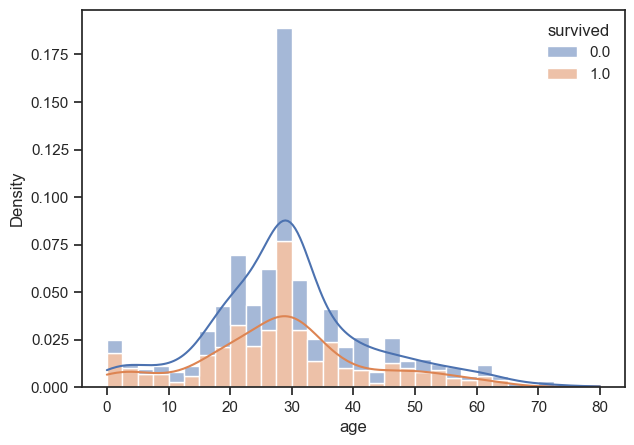

In [57]:
# Plotting age VS survived after KNN imputation
plt.figure(figsize= (7,5))
sns.histplot(data=df_train, x='age', hue='survived', multiple='stack',kde= True,stat="density", common_norm=False)
plt.show()



<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:left;font-weight: bold;">Handling Outliers</h1>

</div>

IQR: We find the thresholds on analysis using IQR calculation. Now, re-assignment with thresholds will be done. It means the outliers will be replaced with upper and lower thresholds. Why this kind of process is made is based on preventing the loss of data. Especially in the small dataset, each data is significant.

In the literature, the upper limit is taken as 75% quantile(Q3), and a higher value than 1.5xQ3 will be replaced this threshold, a similar process is done with the lower value that is lower than 1.5xQ1, where Q1 is 25% qua

<AxesSubplot:xlabel='age'>

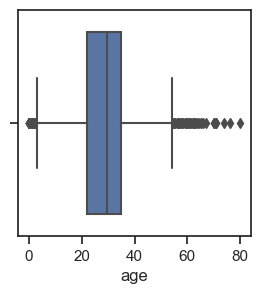

In [58]:
# age Outliers

plt.figure(figsize= (3,3))
sns.boxplot(x=df_train['age'])

### We see that around 70 startitng age outliers

<AxesSubplot:xlabel='fare'>

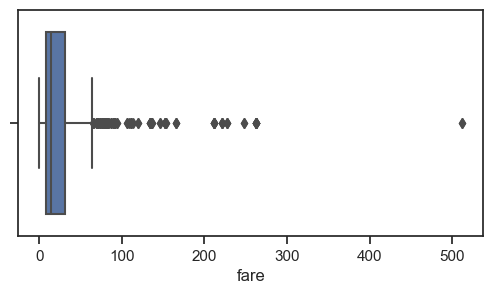

In [59]:
# fare Outliers

plt.figure(figsize= (6,3))
sns.boxplot(x=df_train['fare'])

###  We see that around 230 startitng fare outliers

### checking fare feature

In [60]:
# A fuction to get the IQR upper and lower values with 1.5 *

out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Lower_tail 1.5 * iqr :",Lower_tail) 
    print("Upper_tail 1.5 * iqr :",Upper_tail)
    
    


In [61]:
iqr_outliers(df_train['fare'])

Lower_tail 1.5 * iqr : -26.010499715805054
Upper_tail 1.5 * iqr : 64.40629982948303


In [62]:
iqr_outliers(df_train['age'])

Lower_tail 1.5 * iqr : 2.5
Upper_tail 1.5 * iqr : 54.5


In [63]:
# A fuction to get the IQR upper and lower values with * 3 

out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 3 * iqr
    Upper_tail = q3 + 3 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Lower_tail 3 * iqr :",Lower_tail) 
    print("Upper_tail 3 * iqr :",Upper_tail)
    
    


In [64]:
iqr_outliers(df_train['fare'])

Lower_tail 3 * iqr : -59.916799545288086
Upper_tail 3 * iqr : 98.31259965896606


In [65]:
iqr_outliers(df_train['age'])

Lower_tail 3 * iqr : -17.0
Upper_tail 3 * iqr : 74.0


In [66]:
# Creating new df for outliers check

df_check_outliers = df_train.copy()

### fare feature with outliers

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

def Box_plots(x):
    plt.figure(figsize= (5,4))
    sns.boxplot(x)
    plt.show()
    
def hist_plots(x):
    plt.figure(figsize= (5,4))
    plt.hist(x)
    plt.show()

def qq_plots(x):
    from scipy import stats
    import numpy as np
    res = stats.probplot(x, plot=plt)
    plt.figure(figsize= (5,4))
    plt.show()


C:\Users\ELADL\Anaconda3\envs\New-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


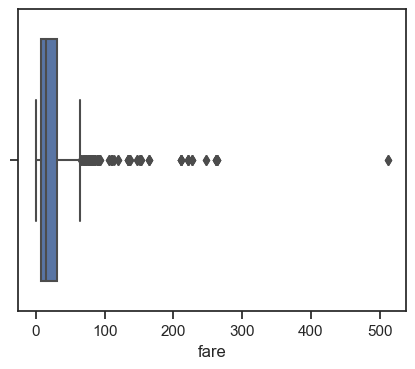

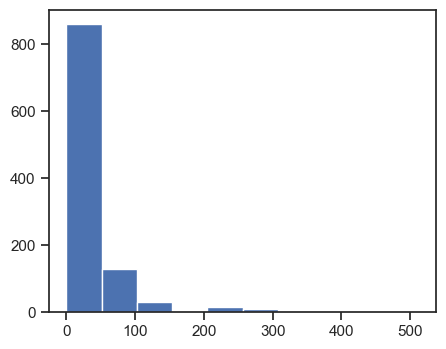

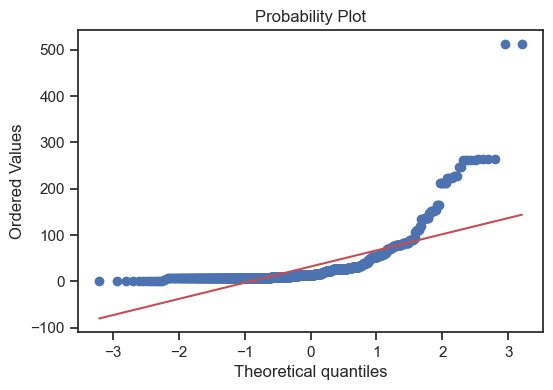

<Figure size 500x400 with 0 Axes>

In [68]:
Box_plots(x=df_check_outliers['fare'])
hist_plots(x=df_check_outliers['fare'])
qq_plots(x=df_check_outliers['fare'])



### Fare without outliers

In [69]:
#outlier_thresholds -defining Q3 and Q1 as 75th and 25t

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 +  1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    print("Lower_tail 1.5 * iqr :",low_limit) 
    print("Upper_tail 1.5 * iqr :",up_limit)
    return low_limit, up_limit

In [70]:
# a function to remove outliers from treshhold

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [71]:
# Repacing fare tliers with thresholds

replace_with_thresholds(df_check_outliers,'fare' )

Lower_tail 1.5 * iqr : -26.010499715805054
Upper_tail 1.5 * iqr : 64.40629982948303


C:\Users\ELADL\Anaconda3\envs\New-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


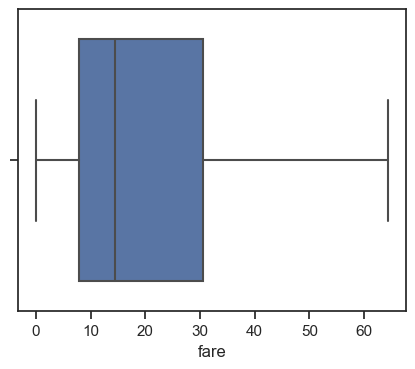

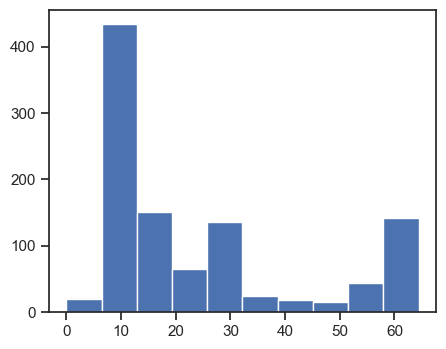

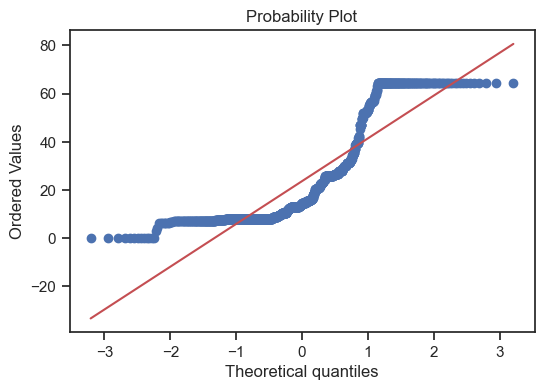

<Figure size 500x400 with 0 Axes>

In [72]:
# Ploting after the cjhanges

Box_plots(df_check_outliers['fare'])
hist_plots(df_check_outliers['fare'])
qq_plots(df_check_outliers['fare'])

### age feature with outliers

In [73]:
# A fuction to get the IQR upper and lower values with 3 * iqr because we see that fro  around 70 there are outliers

out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 3 * iqr
    Upper_tail = q3 + 3 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Lower_tail 3 * iqr :",Lower_tail) 
    print("Upper_tail 3 * iqr :",Upper_tail)
    
    

C:\Users\ELADL\Anaconda3\envs\New-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


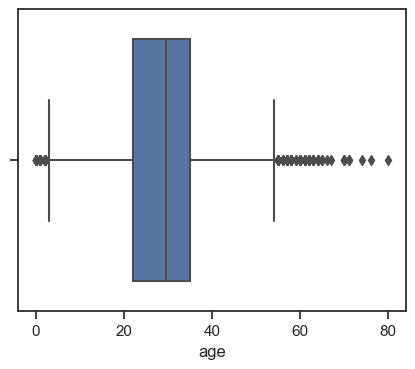

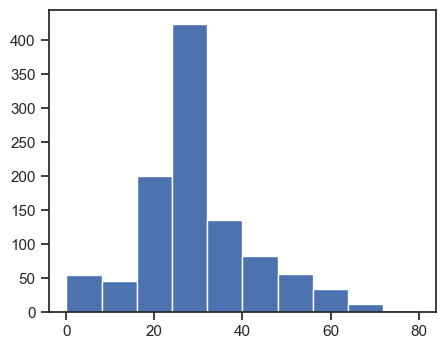

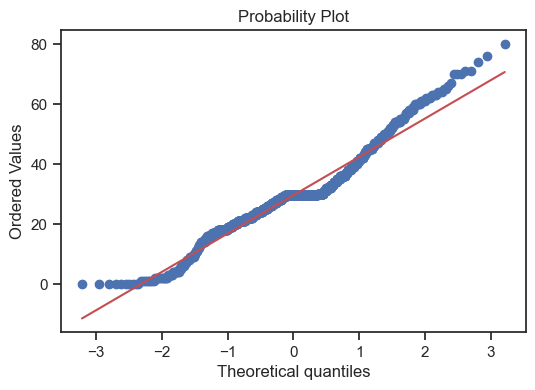

<Figure size 500x400 with 0 Axes>

In [74]:
Box_plots(df_check_outliers['age'])
hist_plots(df_check_outliers['age'])
qq_plots(df_check_outliers['age'])

In [75]:
# Checking 

iqr_outliers(df_check_outliers['age'])

Lower_tail 3 * iqr : -17.0
Upper_tail 3 * iqr : 74.0


In [76]:
#outlier_thresholds -defining Q3 and Q1 as 75th and 25t

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 +  3 * interquantile_range
    low_limit = quartile1 - 3 * interquantile_range
    return low_limit, up_limit

### age feature without outliers

In [77]:
# Changing age feature outhiers to IQR

replace_with_thresholds(df_check_outliers,'age' )

C:\Users\ELADL\Anaconda3\envs\New-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


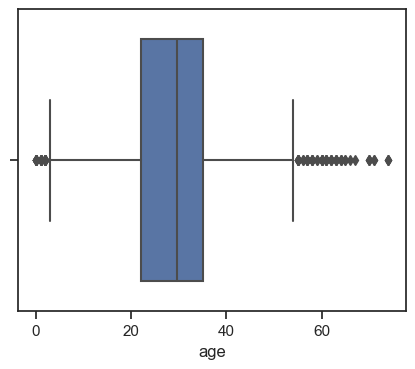

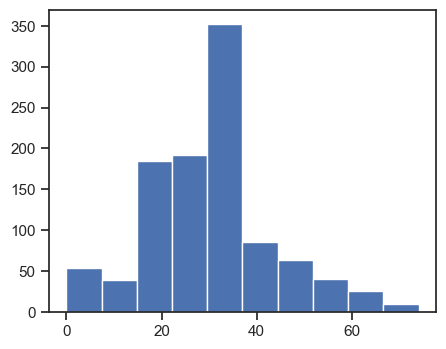

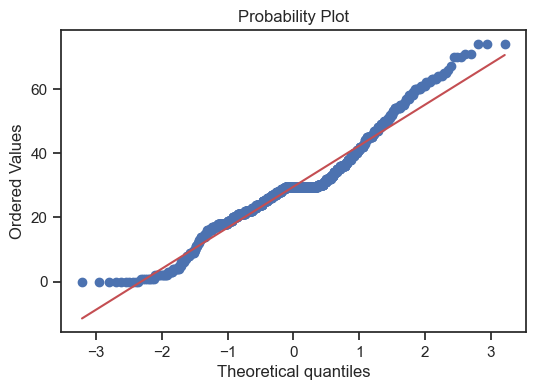

<Figure size 500x400 with 0 Axes>

In [78]:
Box_plots(df_check_outliers['age'])
hist_plots(df_check_outliers['age'])
qq_plots(df_check_outliers['age'])

In [79]:
# Chacking statistic after the outliers changes

df_check_outliers.describe()

age     embarked         fare        parch       pclass  \
count  1046.000000  1046.000000  1046.000000  1046.000000  1046.000000   
mean     29.566348     1.512428    23.654669     0.367113     1.303059   
std      13.032897     0.806278    19.996210     0.814362     0.832894   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      22.000000     1.000000     7.895800     0.000000     1.000000   
50%      29.600000     2.000000    14.427100     0.000000     2.000000   
75%      35.000000     2.000000    30.500000     0.000000     2.000000   
max      74.000000     3.000000    64.406303     9.000000     2.000000   

               sex        sibsp     survived  
count  1046.000000  1046.000000  1046.000000  
mean      0.353728     0.512428     0.383365  
std       0.478355     1.072197     0.486439  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       1.000000     1.000000     1.000000  
max       1.000000     8.000000     1.000000

In [80]:
# Creating a df after removing outliers

df_without_outliers = df_check_outliers.copy()

In [81]:
df_without_outliers.head()

age  embarked     fare  parch  pclass  sex  sibsp  survived    title
199  29.6       0.0  15.2458    1.0     2.0  0.0    1.0       1.0   Master
706  12.0       0.0  11.2417    0.0     2.0  0.0    1.0       1.0   Master
555  18.0       2.0  13.0000    1.0     1.0  1.0    1.0       0.0     Miss
382  37.0       2.0   9.5875    0.0     2.0  1.0    0.0       0.0     Miss
316  41.0       2.0  39.6875    5.0     2.0  1.0    0.0       0.0      Mrs

In [82]:
# Checking if we have null values in df

df_without_outliers.isnull().sum()

age         0
embarked    0
fare        0
parch       0
pclass      0
sex         0
sibsp       0
survived    0
title       0
dtype: int64




<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:left;font-weight: bold;">Feature engineering</h1>

</div>

In [83]:
# Creating new feature- log fare

df_without_outliers['fare_log'] = df_without_outliers['fare'].apply(lambda x : np.log(x) if x !=0  else 0)

<AxesSubplot:xlabel='fare_log', ylabel='Count'>

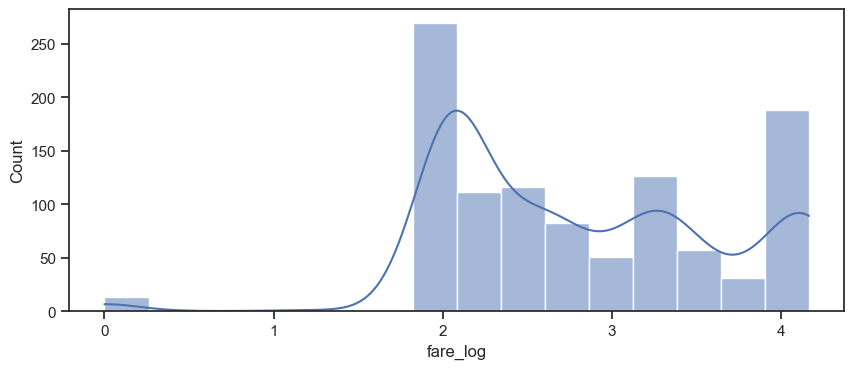

In [84]:
# Ploting the feature

plt.figure(figsize=(10, 4))
sns.histplot(data=df_without_outliers, x='fare_log',kde=True)

In [85]:
# Creating new featyre- 'age_bin' with 5 bins

df_without_outliers['age_bin']  = pd.cut(df_without_outliers['age'], bins=5 , labels=['A','B','C','D','E'])

<AxesSubplot:xlabel='age_bin', ylabel='Count'>

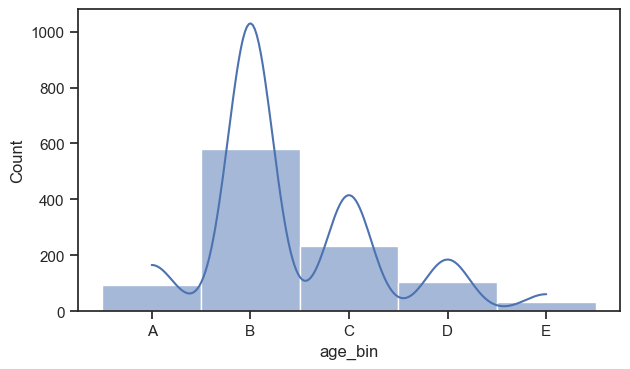

In [86]:
# Ploting new feature

plt.figure(figsize=(7, 4))
sns.histplot(data=df_without_outliers, x='age_bin',kde=True)

In [87]:
# Creating new feature - "is marries" if the women is married or not based on the title feature'


df_without_outliers['Is_Married'] = np.where(df_without_outliers['title'] == ' Mrs', 1, 0)

In [88]:
# changing title feature value to 'Rare' if it not in the common list


df_without_outliers.loc[~df_without_outliers['title'].isin([' Mr',' Mrs', ' Miss',' Master']),'title'] = ' Other'

In [89]:
# Chacking after the changes

df_without_outliers['title'].value_counts()

 Mr        605
 Miss      218
 Mrs       146
 Master     50
 Other      27
Name: title, dtype: int64

In [90]:
# Checking other

filter_others = df_without_outliers[df_without_outliers['title']== ' Other']
filter_others

age  embarked       fare  parch  pclass  sex  sibsp  survived   title  \
128   29.6       1.0   7.750000    0.0     2.0  1.0    0.0       0.0   Other   
471   41.0       2.0  13.000000    0.0     1.0  0.0    0.0       0.0   Other   
152   24.0       0.0  64.406303    0.0     0.0  1.0    0.0       1.0   Other   
477   51.0       2.0  12.525000    0.0     1.0  0.0    0.0       0.0   Other   
418   54.0       2.0  14.000000    0.0     1.0  0.0    0.0       0.0   Other   
328   60.0       2.0  26.549999    0.0     0.0  0.0    0.0       0.0   Other   
1142  53.0       2.0  64.406303    1.0     0.0  0.0    1.0       1.0   Other   
630   47.0       0.0  64.406303    0.0     0.0  0.0    1.0       0.0   Other   
2     28.0       2.0  13.000000    0.0     1.0  1.0    0.0       1.0   Other   
780   50.0       2.0  64.406303    0.0     0.0  0.0    2.0       1.0   Other   
806   30.0       2.0  26.000000    1.0     1.0  0.0    1.0       0.0   Other   
936   27.0       2.0  13.000000    0.0     1.0  0.0    0.0       0.0   Other   
533   40.0       0.0  27.720800    0.0     0.0  0.0    0.0       0.0   Other   
564   32.0       0.0  30.500000    0.0     0.0  0.0    0.0       1.0   Other   
1059  23.0       2.0  10.500000    0.0     1.0  0.0    0.0       0.0   Other   
64    70.0       2.0  64.406303    1.0     0.0  0.0    1.0       0.0   Other   
118   29.6       0.0  39.599998    0.0     0.0  0.0    0.0       0.0   Other   
1001  49.0       0.0  56.929199    0.0     0.0  0.0    1.0       1.0   Other   
200   42.0       2.0  13.000000    0.0     1.0  0.0    0.0       0.0   Other   
1024  28.0       2.0  33.000000    1.0     1.0  0.0    0.0       0.0   Other   
1095  56.0       0.0  35.500000    0.0     0.0  0.0    0.0       1.0   Other   
499   33.0       2.0  64.406303    0.0     0.0  1.0    0.0       1.0   Other   
454   49.0       2.0  25.929199    0.0     0.0  1.0    0.0       1.0   Other   
278   57.0       1.0  12.350000    0.0     1.0  0.0    0.0       0.0   Other   
895   53.0       0.0  28.500000    0.0     0.0  0.0    0.0       1.0   Other   
1150  54.0       2.0  26.000000    0.0     1.0  0.0    1.0       0.0   Other   
1139  24.0       0.0  49.504200    0.0     0.0  1.0    0.0       1.0   Other   

      fare_log age_bin  Is_Married  
128   2.047693       B           0  
471   2.564949       C           0  
152   4.165212       B           0  
477   2.527727       D           0  
418   2.639057       D           0  
328   3.279030       E           0  
1142  4.165212       D           0  
630   4.165212       D           0  
2     2.564949       B           0  
780   4.165212       D           0  
806   3.258097       C           0  
936   2.564949       B           0  
533   3.322183       C           0  
564   3.417727       C           0  
1059  2.351375       B           0  
64    4.165212       E           0  
118   3.678829       B           0  
1001  4.041808       D           0  
200   2.564949       C           0  
1024  3.496508       B           0  
1095  3.569533       D           0  
499   4.165212       C           0  
454   3.255370       D           0  
278   2.513656       D           0  
895   3.349904       D           0  
1150  3.258097       D           0  
1139  3.902058       B           0

In [91]:
group_filter_others = df_without_outliers.groupby(['title','survived','embarked','pclass','parch'])['survived'].count().to_frame()


In [92]:
group_filter_others['survived'].tail(11)

title   survived  embarked  pclass  parch
 Other  0.0       0.0       0.0     0.0      3
                  1.0       1.0     0.0      1
                            2.0     0.0      1
                  2.0       0.0     0.0      1
                                    1.0      1
                            1.0     0.0      7
                                    1.0      2
        1.0       0.0       0.0     0.0      6
                  2.0       0.0     0.0      3
                                    1.0      1
                            1.0     0.0      1
Name: survived, dtype: int64

## we can see that from "other", 11 passengers from 27 survived, 6 of them from embark 0 and the rest from embark 2, and 10 were in pclass 0 and in parch 1

In [93]:
# Checking df 

df_without_outliers.head()

age  embarked     fare  parch  pclass  sex  sibsp  survived    title  \
199  29.6       0.0  15.2458    1.0     2.0  0.0    1.0       1.0   Master   
706  12.0       0.0  11.2417    0.0     2.0  0.0    1.0       1.0   Master   
555  18.0       2.0  13.0000    1.0     1.0  1.0    1.0       0.0     Miss   
382  37.0       2.0   9.5875    0.0     2.0  1.0    0.0       0.0     Miss   
316  41.0       2.0  39.6875    5.0     2.0  1.0    0.0       0.0      Mrs   

     fare_log age_bin  Is_Married  
199  2.724304       B           0  
706  2.419630       A           0  
555  2.564949       B           0  
382  2.260460       C           0  
316  3.681036       C           1

In [94]:
df_without_outliers = df_without_outliers.drop('survived',axis=1)

In [95]:
df_without_outliers['survived'] = df_check_outliers['survived']

Text(0.5, 1.0, 'Correlation Matrix')

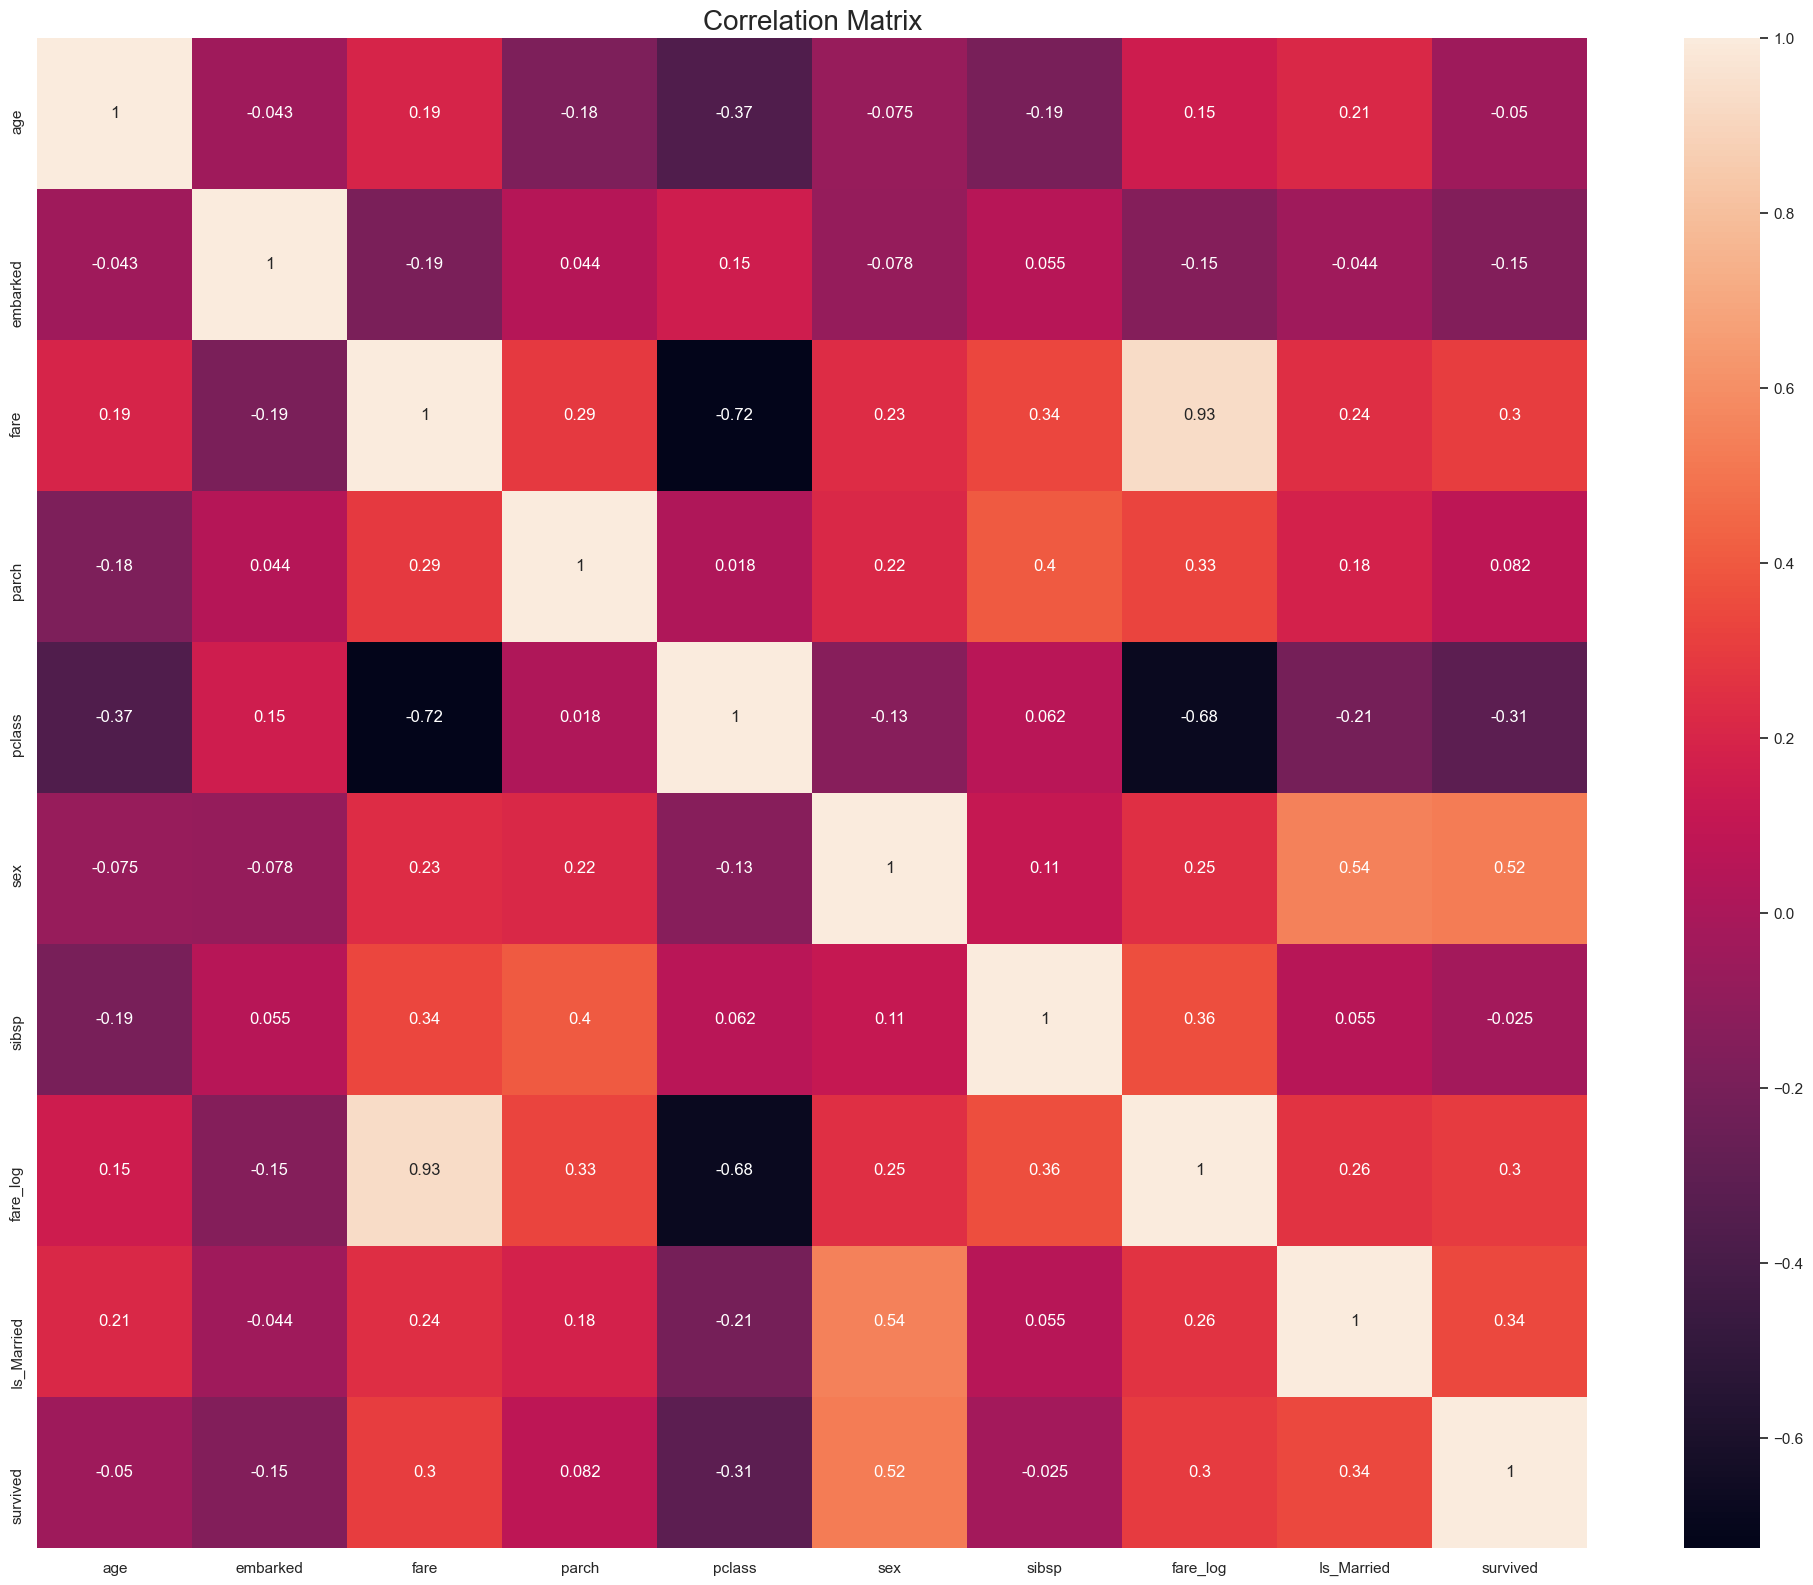

In [96]:
#Correlation of all features after label encoding

sns.set(rc = {'figure.figsize':(25,20)})
sns.heatmap(df_without_outliers.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=20)

In [97]:
df_without_outliers.corr()['survived'].sort_values(ascending=False)[1:].head(10)

sex           0.522924
Is_Married    0.340597
fare          0.299274
fare_log      0.296883
parch         0.081620
sibsp        -0.024740
age          -0.050159
embarked     -0.154894
pclass       -0.313018
Name: survived, dtype: float64

###  we can see that sex,Is_Married, fare, embarked and pclass has correlation with surviced

# Scaling numerical variables

In [98]:
# Scaling between -1 and 1. Good practice for continuous variables.
from sklearn import preprocessing

for col in ['age','fare','fare_log']:
    transf = df_without_outliers[col].values.reshape(-1,1)
    scaler = preprocessing.StandardScaler().fit(transf)
    df_without_outliers[col] = scaler.transform(transf)

# Label encoder

In [99]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Fit and transform the column
df_without_outliers['title'] = le.fit_transform(df_without_outliers['title'])
df_without_outliers['age_bin'] = le.fit_transform(df_without_outliers['age_bin'])

# One hot encoding - categorial variables

In [100]:
# one hot encoding all the categories data and getting final dataset

final_df=pd.get_dummies(df_without_outliers, columns=['embarked','parch','pclass','sex','sibsp','age_bin','Is_Married','title'])


In [101]:
# Adding survived feature

final_df['survived'] = df_train['survived'].copy()

In [102]:
# Movivng stroke feature to the end

final_df = final_df.drop('survived',axis=1) 
final_df['survived'] = df_train['survived']

In [103]:
# Checking df

final_df.head()

age      fare  fare_log  embarked_0.0  embarked_1.0  embarked_2.0  \
199  0.002583 -0.420724 -0.114280             1             0             0   
706 -1.348492 -0.621063 -0.475967             1             0             0   
555 -0.887898 -0.533089 -0.303454             0             0             1   
382  0.570649 -0.703828 -0.664922             0             0             1   
316  0.877711  0.802177  1.021484             0             0             1   

     embarked_3.0  parch_0.0  parch_1.0  parch_2.0  ...  age_bin_3  age_bin_4  \
199             0          0          1          0  ...          0          0   
706             0          1          0          0  ...          0          0   
555             0          0          1          0  ...          0          0   
382             0          1          0          0  ...          0          0   
316             0          0          0          0  ...          0          0   

     Is_Married_0  Is_Married_1  title_0  title_1  title_2  title_3  title_4  \
199             1             0        1        0        0        0        0   
706             1             0        1        0        0        0        0   
555             1             0        0        1        0        0        0   
382             1             0        0        1        0        0        0   
316             0             1        0        0        0        1        0   

     survived  
199       1.0  
706       1.0  
555       0.0  
382       0.0  
316       0.0  

[5 rows x 39 columns]

In [104]:
# Checking statistic

final_df.describe()

age          fare      fare_log  embarked_0.0  embarked_1.0  \
count  1.046000e+03  1.046000e+03  1.046000e+03   1046.000000   1046.000000   
mean  -1.634554e-16  1.276428e-08 -6.894846e-16      0.197897      0.093690   
std    1.000478e+00  1.000478e+00  1.000478e+00      0.398604      0.291537   
min   -2.269679e+00 -1.183523e+00 -3.348379e+00      0.000000      0.000000   
25%   -5.808354e-01 -7.884697e-01 -8.953787e-01      0.000000      0.000000   
50%    2.583317e-03 -4.616866e-01 -1.798064e-01      0.000000      0.000000   
75%    4.171176e-01  3.424952e-01  7.089020e-01      0.000000      0.000000   
max    3.410977e+00  2.038943e+00  1.596263e+00      1.000000      1.000000   

       embarked_2.0  embarked_3.0    parch_0.0    parch_1.0    parch_2.0  ...  \
count   1046.000000   1046.000000  1046.000000  1046.000000  1046.000000  ...   
mean       0.706501      0.001912     0.772467     0.124283     0.086998  ...   
std        0.455583      0.043706     0.419440     0.330062     0.281967  ...   
min        0.000000      0.000000     0.000000     0.000000     0.000000  ...   
25%        0.000000      0.000000     1.000000     0.000000     0.000000  ...   
50%        1.000000      0.000000     1.000000     0.000000     0.000000  ...   
75%        1.000000      0.000000     1.000000     0.000000     0.000000  ...   
max        1.000000      1.000000     1.000000     1.000000     1.000000  ...   

         age_bin_3    age_bin_4  Is_Married_0  Is_Married_1      title_0  \
count  1046.000000  1046.000000   1046.000000   1046.000000  1046.000000   
mean      0.099426     0.032505      0.860421      0.139579     0.047801   
std       0.299377     0.177421      0.346716      0.346716     0.213447   
min       0.000000     0.000000      0.000000      0.000000     0.000000   
25%       0.000000     0.000000      1.000000      0.000000     0.000000   
50%       0.000000     0.000000      1.000000      0.000000     0.000000   
75%       0.000000     0.000000      1.000000      0.000000     0.000000   
max       1.000000     1.000000      1.000000      1.000000     1.000000   

           title_1      title_2      title_3      title_4     survived  
count  1046.000000  1046.000000  1046.000000  1046.000000  1046.000000  
mean      0.208413     0.578394     0.139579     0.025813     0.383365  
std       0.406368     0.494052     0.346716     0.158652     0.486439  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     1.000000     0.000000     0.000000     0.000000  
75%       0.000000     1.000000     0.000000     0.000000     1.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 39 columns]

Text(0.5, 1.0, 'Correlation Matrix')

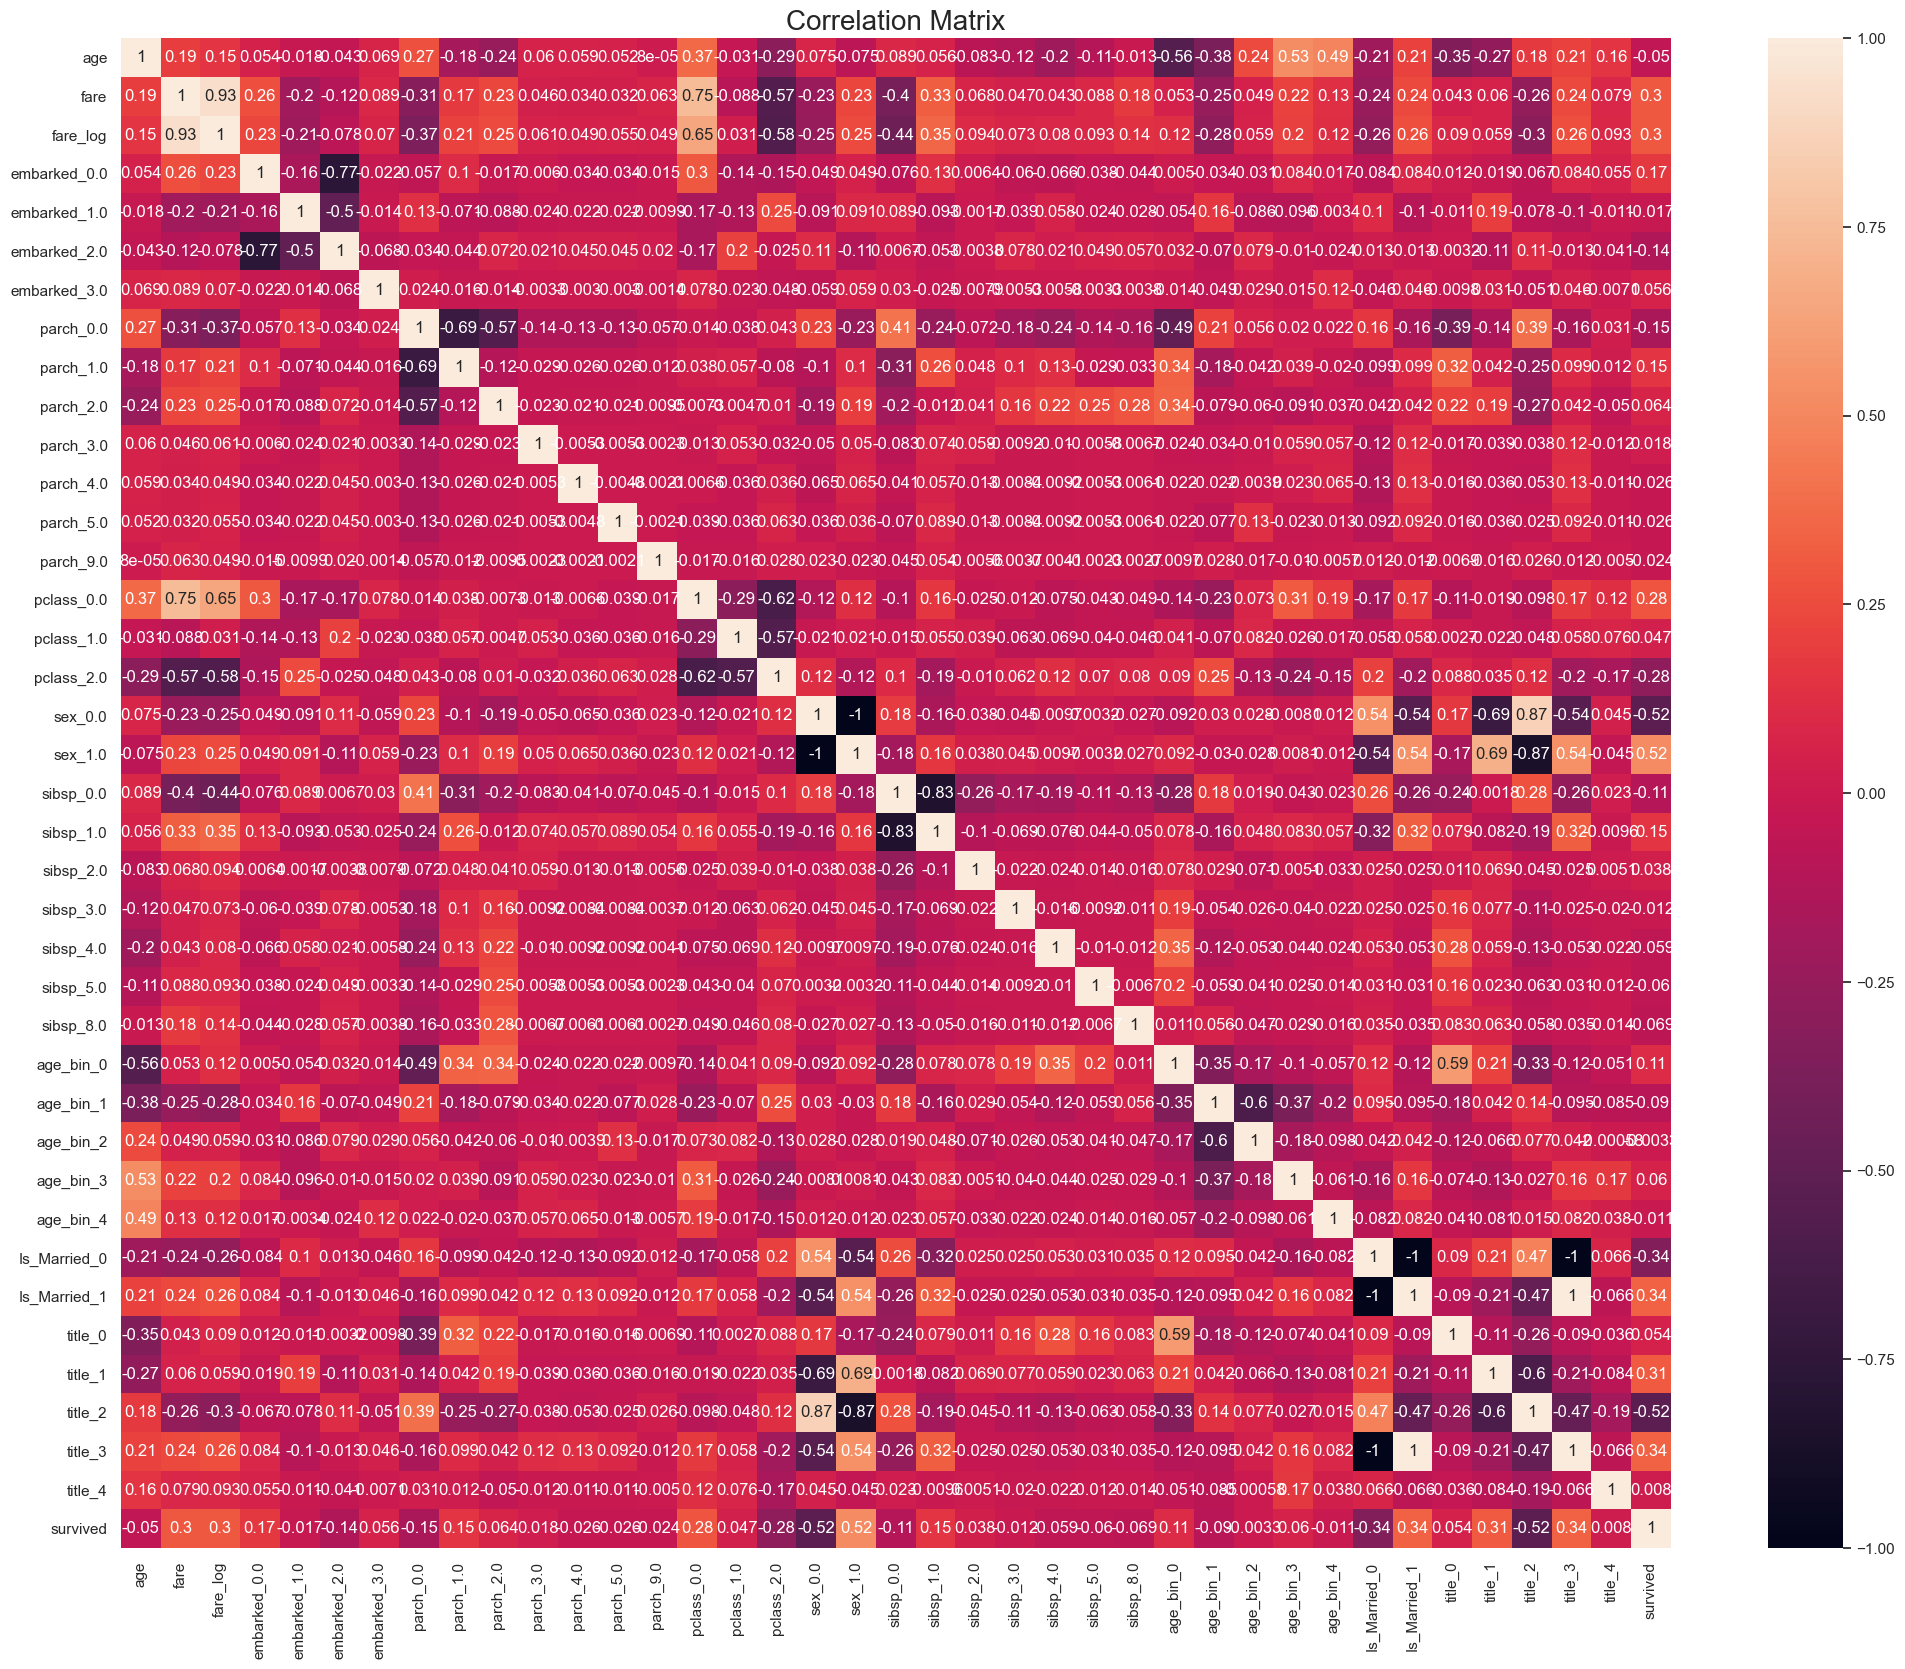

In [105]:
#Correlation of all features after label encoding

sns.set(rc = {'figure.figsize':(25,20)})
sns.heatmap(final_df.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=20)

In [106]:
final_df.corr()['survived'].sort_values(ascending=False)[1:].head(10)

sex_1.0         0.522924
Is_Married_1    0.340597
title_3         0.340597
title_1         0.311889
fare            0.299274
fare_log        0.296883
pclass_0.0      0.282280
embarked_0.0    0.166040
sibsp_1.0       0.153561
parch_1.0       0.149973
Name: survived, dtype: float64

### we can see that all below have some correlation with survived :
- sex_1.0         0.522924
- Is_Married_1    0.340597
- title_3         0.340597
- title_1         0.311889
- fare            0.299274
- fare_log        0.296883
- pclass_0.0      0.282280
- embarked_0.0    0.166040
- sibsp_1.0       0.153561
- parch_1.0       0.149973





<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">ML</h1>

</div>

In [107]:
final_df.head()

age      fare  fare_log  embarked_0.0  embarked_1.0  embarked_2.0  \
199  0.002583 -0.420724 -0.114280             1             0             0   
706 -1.348492 -0.621063 -0.475967             1             0             0   
555 -0.887898 -0.533089 -0.303454             0             0             1   
382  0.570649 -0.703828 -0.664922             0             0             1   
316  0.877711  0.802177  1.021484             0             0             1   

     embarked_3.0  parch_0.0  parch_1.0  parch_2.0  ...  age_bin_3  age_bin_4  \
199             0          0          1          0  ...          0          0   
706             0          1          0          0  ...          0          0   
555             0          0          1          0  ...          0          0   
382             0          1          0          0  ...          0          0   
316             0          0          0          0  ...          0          0   

     Is_Married_0  Is_Married_1  title_0  title_1  title_2  title_3  title_4  \
199             1             0        1        0        0        0        0   
706             1             0        1        0        0        0        0   
555             1             0        0        1        0        0        0   
382             1             0        0        1        0        0        0   
316             0             1        0        0        0        1        0   

     survived  
199       1.0  
706       1.0  
555       0.0  
382       0.0  
316       0.0  

[5 rows x 39 columns]

In [108]:
# Selecting X and y

X = final_df.drop('survived',axis=1)
y = final_df['survived'].copy()

In [109]:
# Checking the shapes

X.shape,y.shape

((1046, 38), (1046,))

In [110]:
# Split train and dev

from sklearn.model_selection import train_test_split

X_train, X_dev, y_train, y_dev = train_test_split(X,y,test_size=0.20,random_state=42)

In [111]:
# Checking the shapes after the splitting

X_train.shape , X_dev.shape, y_train.shape, y_dev.shape

((836, 38), (210, 38), (836,), (210,))

## Logistic Regression

In [112]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression

#Run LR model

mod1 = LogisticRegression(random_state=42)
mod1.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [113]:
#preding on train set

yhat1_tr = mod1.predict(X_train)


In [114]:
#preding the propability on train set

yprob1_tr = mod1.predict_proba(X_train)
yprob1_tr

array([[0.86281534, 0.13718466],
       [0.61576441, 0.38423559],
       [0.82265558, 0.17734442],
       ...,
       [0.65958474, 0.34041526],
       [0.78359942, 0.21640058],
       [0.86708835, 0.13291165]])

In [115]:
# Checking model score and AUC score on train set

yhat1_tr = mod1.predict(X_train)
print(pd.crosstab(y_train,yhat1_tr))
yprob1_tr = mod1.predict_proba(X_train)
print('---------------')
print(mod1.score(X_train,y_train))
print(roc_auc_score(y_train, yprob1_tr[:,1]))

col_0     0.0  1.0
survived          
0.0       442   74
1.0        96  224
---------------
0.7966507177033493
0.8409429505813953


In [116]:
# Checking model score and AUC score on test set

yhat1_ts = mod1.predict(X_dev)
print(pd.crosstab(y_dev,yhat1_ts))
yprob1_ts = mod1.predict_proba(X_dev)
print('---------------')
print(mod1.score(X_dev,y_dev))
print(roc_auc_score(y_dev, yprob1_ts[:,1]))

col_0     0.0  1.0
survived          
0.0       109   20
1.0        13   68
---------------
0.8428571428571429
0.9044406163269212


In [117]:
# Checking model measurments on both train and test sets

res = {1:{'model':'Logistic Regression',
           'accuracy-Train':mod1.score(X_train,y_train),
           'accuracy-Dev':mod1.score(X_dev,y_dev),
           'AUC-train':roc_auc_score(y_train, yprob1_tr[:,1]),
           'AUC-dev':roc_auc_score(y_dev, yprob1_ts[:,1]),
          'Recall-train':recall_score(y_train,yhat1_tr),
          'Recall-dev':recall_score(y_dev, yhat1_ts),
          'Precision-train':precision_score(y_train,yhat1_tr),
          'Precision-dev':recall_score(y_dev, yhat1_ts),
          'F-measure-train':f1_score(y_train,yhat1_tr),
          'F-measure-dev':f1_score(y_dev, yhat1_ts)
      }}

In [118]:
res

{1: {'model': 'Logistic Regression',
  'accuracy-Train': 0.7966507177033493,
  'accuracy-Dev': 0.8428571428571429,
  'AUC-train': 0.8409429505813953,
  'AUC-dev': 0.9044406163269212,
  'Recall-train': 0.7,
  'Recall-dev': 0.8395061728395061,
  'Precision-train': 0.7516778523489933,
  'Precision-dev': 0.8395061728395061,
  'F-measure-train': 0.7249190938511326,
  'F-measure-dev': 0.8047337278106509}}

In [119]:
# Function to create ROC-AUC plot

from matplotlib import pyplot

def plot_roc_curve(fpr, tpr):   #(False Positive Rate , True Positive Rate)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [120]:
#Checking roc_curve on dev

fpr, tpr, thresholds = roc_curve(y_dev, yprob1_ts[:,1])

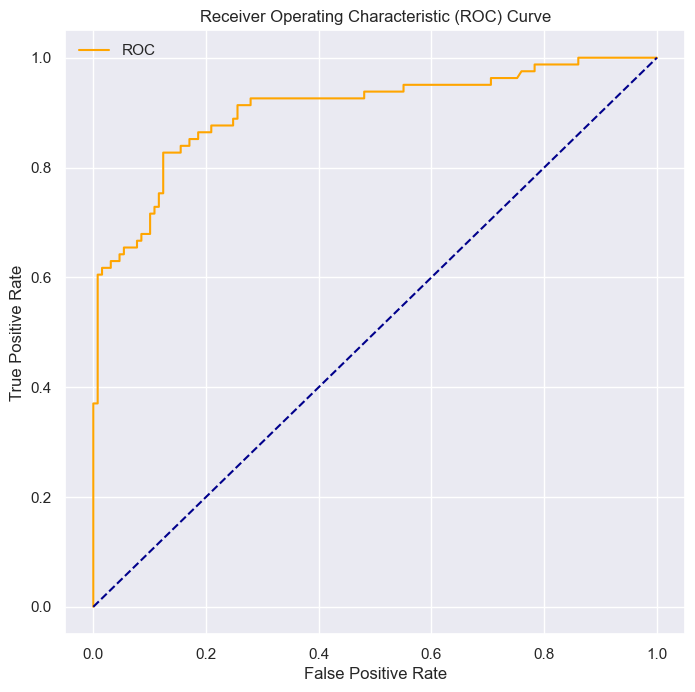

In [121]:
plt.figure(figsize=(8,8))
plot_roc_curve(fpr, tpr)

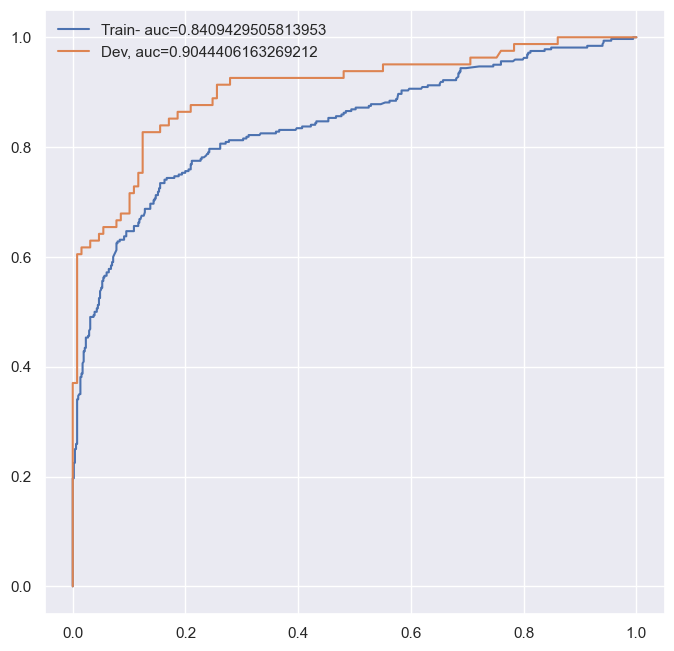

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

pred = yprob1_tr[:,1]
label = y_train
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Train- auc="+str(auc))

pred = yprob1_ts[:,1]
label = y_dev
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Dev, auc="+str(auc))
plt.legend(loc=0)

### LR - train measures

In [123]:
acc_train_rf = accuracy_score(y_train,yhat1_tr)
rf_perc_score = precision_score(y_train,yhat1_tr)
rf_rec_score= recall_score(y_train,yhat1_tr)
rf_f1_score = f1_score(y_train,yhat1_tr)

In [124]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_train_rf)

Precision: 0.752
Recall: 0.700
F-measure: 0.725
accuracy_score: 0.797


### LR- dev measures

In [125]:
acc_dev_rf = accuracy_score(y_dev,yhat1_ts)
rf_perc_score = precision_score(y_dev,yhat1_ts)
rf_rec_score= recall_score(y_dev,yhat1_ts)
rf_f1_score = f1_score(y_dev,yhat1_ts)

In [126]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_dev_rf)

Precision: 0.773
Recall: 0.840
F-measure: 0.805
accuracy_score: 0.843


### We see that the dev set perform better results..

##  Decision Tree Model
A Decision Tree Classifier functions by breaking down a dataset into smaller and smaller subsets based on different criteria. Different sorting criteria will be used to divide the dataset, with the number of examples getting smaller with every division.

In [127]:
mod2 = DecisionTreeClassifier(random_state=42)
mod2.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [128]:
yhat2_tr = mod2.predict(X_train)
print(pd.crosstab(y_train,yhat2_tr))
yprob2_tr = mod2.predict_proba(X_train)
print('---------------')
print(mod2.score(X_train,y_train))
print(roc_auc_score(y_train, yprob2_tr[:,1]))

col_0     0.0  1.0
survived          
0.0       510    6
1.0        17  303
---------------
0.972488038277512
0.9982164486434109


In [129]:
yhat2_ts = mod2.predict(X_dev)
print(pd.crosstab(y_dev,yhat2_ts))
yprob2_ts = mod2.predict_proba(X_dev)
print('---------------')
print(mod2.score(X_dev,y_dev))
print(roc_auc_score(y_dev, yprob2_ts[:,1]))

col_0     0.0  1.0
survived          
0.0        98   31
1.0        19   62
---------------
0.7619047619047619
0.7744281749449708


In [130]:
res[2] = {'model':'Decision Tree',
           'accuracy-Train':mod2.score(X_train,y_train),
           'accuracy-Dev':mod2.score(X_dev,y_dev),
           'AUC-train':roc_auc_score(y_train, yprob2_tr[:,1]),
           'AUC-dev':roc_auc_score(y_dev, yprob2_ts[:,1]),
          'Recall-train':recall_score(y_train,yhat2_tr),
          'Recall-dev':recall_score(y_dev, yhat2_ts),
          'Precision-train':precision_score(y_train,yhat2_tr),
          'Precision-dev':recall_score(y_dev, yhat2_ts),
          'F-measure-train':f1_score(y_train,yhat2_tr),
          'F-measure-dev':f1_score(y_dev, yhat2_ts)
         }

In [131]:
res[2]

{'model': 'Decision Tree',
 'accuracy-Train': 0.972488038277512,
 'accuracy-Dev': 0.7619047619047619,
 'AUC-train': 0.9982164486434109,
 'AUC-dev': 0.7744281749449708,
 'Recall-train': 0.946875,
 'Recall-dev': 0.7654320987654321,
 'Precision-train': 0.9805825242718447,
 'Precision-dev': 0.7654320987654321,
 'F-measure-train': 0.9634340222575518,
 'F-measure-dev': 0.7126436781609194}

In [132]:
fpr, tpr, thresholds = roc_curve(y_dev, yprob2_ts[:,1])

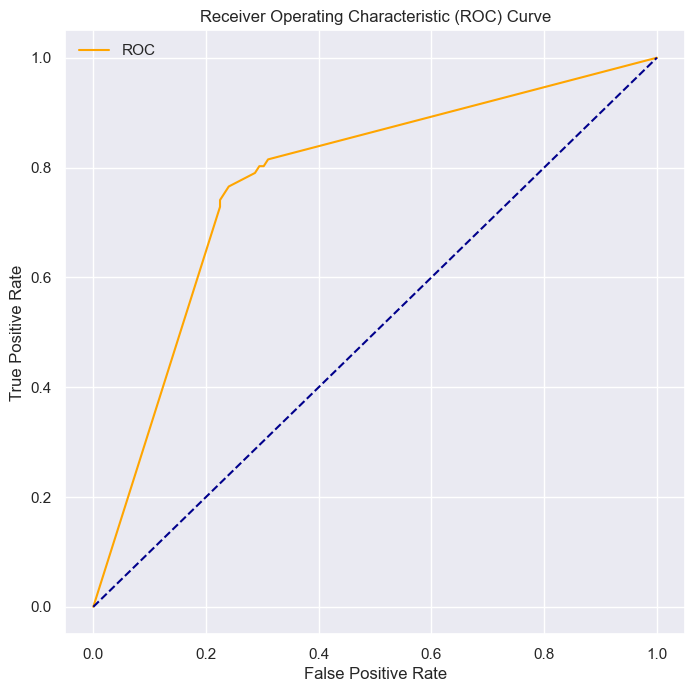

In [133]:
plt.figure(figsize=(8,8))
plot_roc_curve(fpr, tpr)

### Decision Tree - train measures

In [134]:
acc_train_rf = accuracy_score(y_train,yhat2_tr)
rf_perc_score = precision_score(y_train,yhat2_tr)
rf_rec_score= recall_score(y_train,yhat2_tr)
rf_f1_score = f1_score(y_train,yhat2_tr)

In [135]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_train_rf)

Precision: 0.981
Recall: 0.947
F-measure: 0.963
accuracy_score: 0.972


### Decision Tree - dev measures

In [136]:
acc_dev_rf = accuracy_score(y_dev,yhat2_ts)
rf_perc_score = precision_score(y_dev,yhat2_ts)
rf_rec_score= recall_score(y_dev,yhat2_ts)
rf_f1_score = f1_score(y_dev,yhat2_ts)

In [137]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_dev_rf)

Precision: 0.667
Recall: 0.765
F-measure: 0.713
accuracy_score: 0.762


### Random Forest Mode

In [138]:
mod3 = RandomForestClassifier(random_state=42)
mod3.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [139]:
yhat3_tr = mod3.predict(X_train)
print(pd.crosstab(y_train,yhat3_tr))
yprob3_tr = mod3.predict_proba(X_train)
print('---------------')
print(mod3.score(X_train,y_train))
print(roc_auc_score(y_train, yprob3_tr[:,1]))

col_0     0.0  1.0
survived          
0.0       505   11
1.0        12  308
---------------
0.972488038277512
0.9958242490310076


In [140]:
yhat3_ts = mod3.predict(X_dev)
print(pd.crosstab(y_dev,yhat3_ts))
yprob3_ts = mod3.predict_proba(X_dev)
print('---------------')
print(mod3.score(X_dev,y_dev))
print(roc_auc_score(y_dev, yprob3_ts[:,1]))

col_0     0.0  1.0
survived          
0.0       104   25
1.0        15   66
---------------
0.8095238095238095
0.89420040195234


In [141]:
res[3] = {'model':'Random Forest',
           'accuracy-Train':mod3.score(X_train,y_train),
           'accuracy-Dev':mod3.score(X_dev,y_dev),
           'AUC-train':roc_auc_score(y_train, yprob3_tr[:,1]),
           'AUC-dev':roc_auc_score(y_dev, yprob3_ts[:,1]),
          'Recall-train':recall_score(y_train,yhat3_tr),
          'Recall-dev':recall_score(y_dev, yhat3_ts),
          'Precision-train':precision_score(y_train,yhat3_tr),
          'Precision-dev':recall_score(y_dev, yhat3_ts),
          'F-measure-train':f1_score(y_train,yhat3_tr),
          'F-measure-dev':f1_score(y_dev, yhat3_ts)
         }

In [142]:
res[3]

{'model': 'Random Forest',
 'accuracy-Train': 0.972488038277512,
 'accuracy-Dev': 0.8095238095238095,
 'AUC-train': 0.9958242490310076,
 'AUC-dev': 0.89420040195234,
 'Recall-train': 0.9625,
 'Recall-dev': 0.8148148148148148,
 'Precision-train': 0.9655172413793104,
 'Precision-dev': 0.8148148148148148,
 'F-measure-train': 0.9640062597809077,
 'F-measure-dev': 0.7674418604651162}

In [143]:

fpr, tpr, thresholds = roc_curve(y_dev, yprob3_ts[:,1])

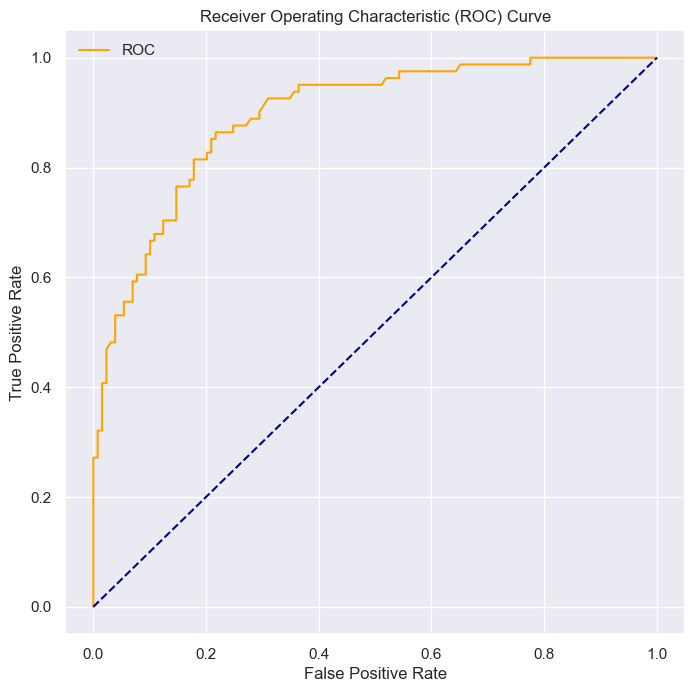

In [144]:
plt.figure(figsize=(8,8))
plot_roc_curve(fpr, tpr)

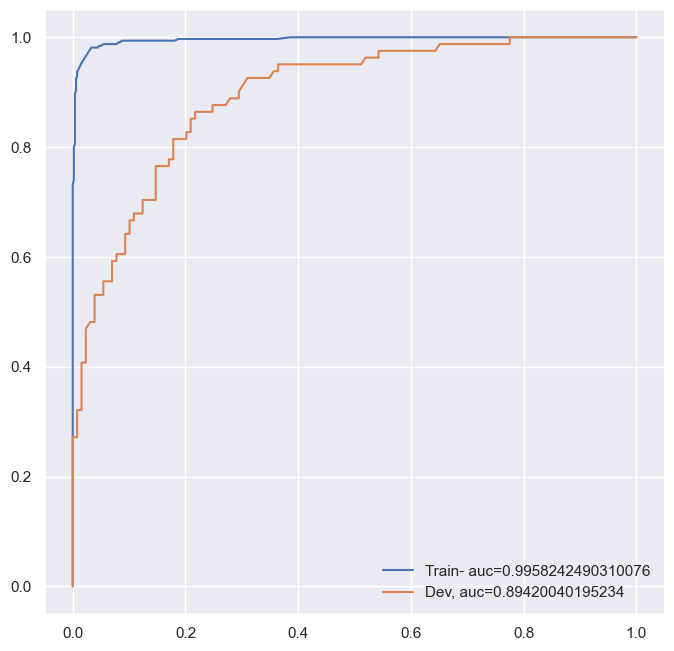

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))


pred = yprob3_tr[:,1]
label = y_train
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Train- auc="+str(auc))

pred = yprob3_ts[:,1]
label = y_dev
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Dev, auc="+str(auc))

plt.legend(loc=0)

### RF - train measures

In [146]:
acc_train_rf = accuracy_score(y_train,yhat3_tr)
rf_perc_score = precision_score(y_train,yhat3_tr)
rf_rec_score= recall_score(y_train,yhat3_tr)
rf_f1_score = f1_score(y_train,yhat3_tr)

In [147]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_train_rf)

Precision: 0.966
Recall: 0.963
F-measure: 0.964
accuracy_score: 0.972


### RF - dev measures

In [148]:
acc_dev_rf = accuracy_score(y_dev,yhat3_ts)
rf_perc_score = precision_score(y_dev,yhat3_ts)
rf_rec_score= recall_score(y_dev,yhat3_ts)
rf_f1_score = f1_score(y_dev,yhat3_ts)

In [149]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_dev_rf)

Precision: 0.725
Recall: 0.815
F-measure: 0.767
accuracy_score: 0.810


              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       129
         1.0       0.78      0.81      0.80        81

    accuracy                           0.84       210
   macro avg       0.83      0.83      0.83       210
weighted avg       0.84      0.84      0.84       210



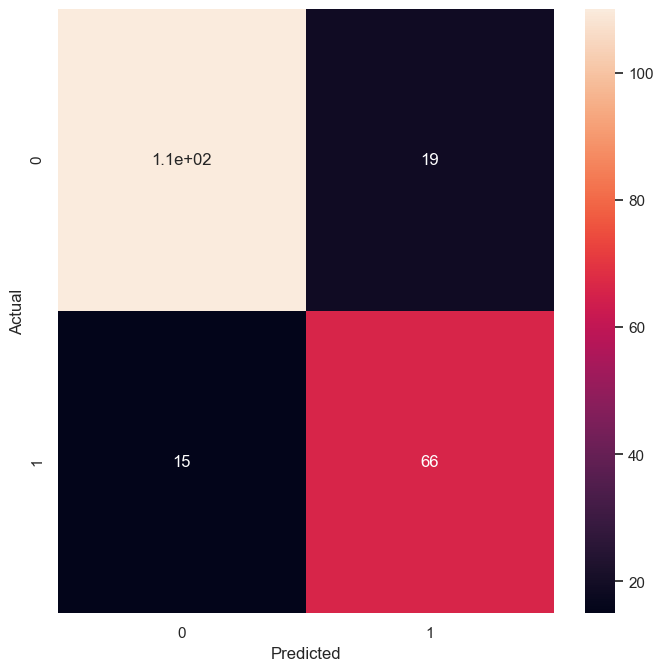

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 75, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rcv = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
rcv.fit(X_train, y_train)

y_pred_rcv = rcv.predict(X_dev)
confusion_rcv = confusion_matrix(y_dev, rcv.predict(X_dev))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_dev, y_pred_rcv))



## SVM classifier

In [151]:
from sklearn.linear_model import SGDClassifier



mod4 = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
mod4.fit(X_train, y_train)



SGDClassifier(loss='log_loss', random_state=42)

In [152]:
yhat4_tr = mod4.predict(X_train)
print(pd.crosstab(y_train,yhat4_tr))
yprob4_tr = mod4.predict_proba(X_train)
print('---------------')
print(mod4.score(X_train,y_train))
print(roc_auc_score(y_train, yprob4_tr[:,1]))

col_0     0.0  1.0
survived          
0.0       448   68
1.0       104  216
---------------
0.7942583732057417
0.829187863372093


In [153]:
yhat4_ts = mod4.predict(X_dev)
print(pd.crosstab(y_dev,yhat4_ts))
yprob4_ts = mod4.predict_proba(X_dev)
print('---------------')
print(mod4.score(X_dev,y_dev))
print(roc_auc_score(y_dev, yprob4_ts[:,1]))

col_0     0.0  1.0
survived          
0.0       108   21
1.0        13   68
---------------
0.8380952380952381
0.8939132931380994


In [154]:
res[4] = {'model':'SVM',
           'accuracy-Train':mod4.score(X_train,y_train),
           'accuracy-Dev':mod4.score(X_dev,y_dev),
           'AUC-train':roc_auc_score(y_train, yprob4_tr[:,1]),
           'AUC-dev':roc_auc_score(y_dev, yprob4_ts[:,1]),
          'Recall-train':recall_score(y_train,yhat4_tr),
          'Recall-dev':recall_score(y_dev, yhat4_ts),
          'Precision-train':precision_score(y_train,yhat4_tr),
          'Precision-dev':recall_score(y_dev, yhat4_ts),
          'F-measure-train':f1_score(y_train,yhat4_tr),
          'F-measure-dev':f1_score(y_dev, yhat4_ts)
         }

In [155]:
res[4]

{'model': 'SVM',
 'accuracy-Train': 0.7942583732057417,
 'accuracy-Dev': 0.8380952380952381,
 'AUC-train': 0.829187863372093,
 'AUC-dev': 0.8939132931380994,
 'Recall-train': 0.675,
 'Recall-dev': 0.8395061728395061,
 'Precision-train': 0.7605633802816901,
 'Precision-dev': 0.8395061728395061,
 'F-measure-train': 0.7152317880794701,
 'F-measure-dev': 0.8}

In [156]:
fpr, tpr, thresholds = roc_curve(y_dev, yprob4_ts[:,1])

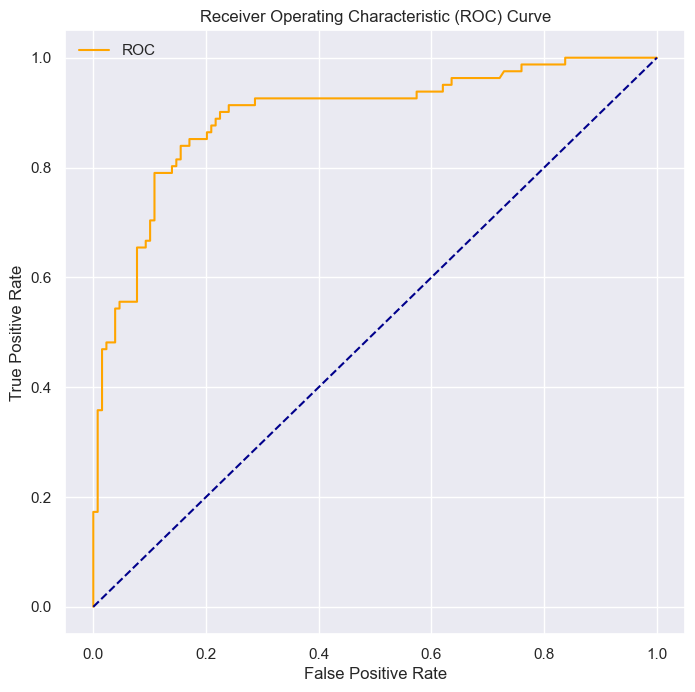

In [157]:
plt.figure(figsize=(8,8))
plot_roc_curve(fpr, tpr)

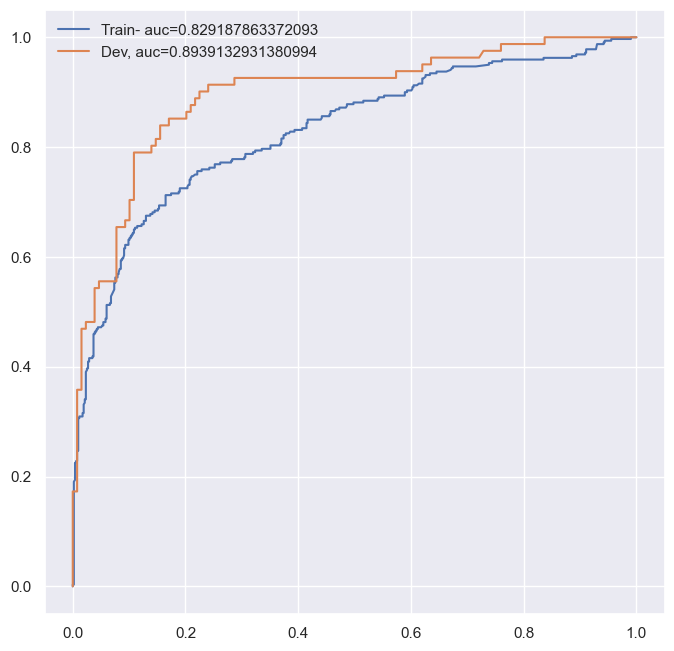

In [158]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

pred = yprob4_tr[:,1]
label = y_train
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Train- auc="+str(auc))

pred = yprob4_ts[:,1]
label = y_dev
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Dev, auc="+str(auc))

plt.legend(loc=0)

### SVM - train measures

In [159]:
acc_train_svm = accuracy_score(y_train,yhat4_tr)
svm_perc_score = precision_score(y_train,yhat4_tr)
svm_rec_score= recall_score(y_train,yhat4_tr)
svm_f1_score = f1_score(y_train,yhat4_tr)

In [160]:
print('Precision: %.3f' %svm_perc_score )
print('Recall: %.3f' % svm_rec_score)
print('F-measure: %.3f' % svm_f1_score)
print('accuracy_score: %.3f' % acc_train_svm)

Precision: 0.761
Recall: 0.675
F-measure: 0.715
accuracy_score: 0.794


### SVM - dev measures

In [161]:
acc_dev_svm = accuracy_score(y_dev,yhat4_ts)
svm_perc_score = precision_score(y_dev,yhat4_ts)
svm_rec_score= recall_score(y_dev,yhat4_ts)
svm_f1_score = f1_score(y_dev,yhat4_ts)

In [162]:
print('Precision: %.3f' %svm_perc_score )
print('Recall: %.3f' % svm_rec_score)
print('F-measure: %.3f' % svm_f1_score)
print('accuracy_score: %.3f' % acc_dev_svm)

Precision: 0.764
Recall: 0.840
F-measure: 0.800
accuracy_score: 0.838


## GBM - Gradient Boosting Machine

In [163]:
from sklearn.ensemble import GradientBoostingClassifier

mod5 = GradientBoostingClassifier(random_state=42)
mod5.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [164]:
yhat5_tr = mod5.predict(X_train)
print(pd.crosstab(y_train,yhat5_tr))
yprob5_tr = mod5.predict_proba(X_train)
print('---------------')
print(mod5.score(X_train,y_train))
print(roc_auc_score(y_train, yprob5_tr[:,1]))

col_0     0.0  1.0
survived          
0.0       490   26
1.0        85  235
---------------
0.8672248803827751
0.9332091812015503


In [165]:
yhat5_ts = mod5.predict(X_dev)
print(pd.crosstab(y_dev,yhat5_ts))
yprob5_ts = mod5.predict_proba(X_dev)
print('---------------')
print(mod5.score(X_dev,y_dev))
print(roc_auc_score(y_dev, yprob5_ts[:,1]))

col_0     0.0  1.0
survived          
0.0       114   15
1.0        15   66
---------------
0.8571428571428571
0.9131017322231793


In [166]:
res[5] = {'model':'Gradient Boosting Machine',
           'accuracy-Train':mod5.score(X_train,y_train),
           'accuracy-Dev':mod5.score(X_dev,y_dev),
           'AUC-train':roc_auc_score(y_train, yprob5_tr[:,1]),
           'AUC-dev':roc_auc_score(y_dev, yprob5_ts[:,1]),
          'Recall-train':recall_score(y_train,yhat5_tr),
          'Recall-dev':recall_score(y_dev, yhat5_ts),
          'Precision-train':precision_score(y_train,yhat5_tr),
          'Precision-dev':recall_score(y_dev, yhat5_ts),
          'F-measure-train':f1_score(y_train,yhat5_tr),
          'F-measure-dev':f1_score(y_dev, yhat5_ts)
         }

In [167]:

fpr, tpr, thresholds = roc_curve(y_dev, yprob5_ts[:,1])

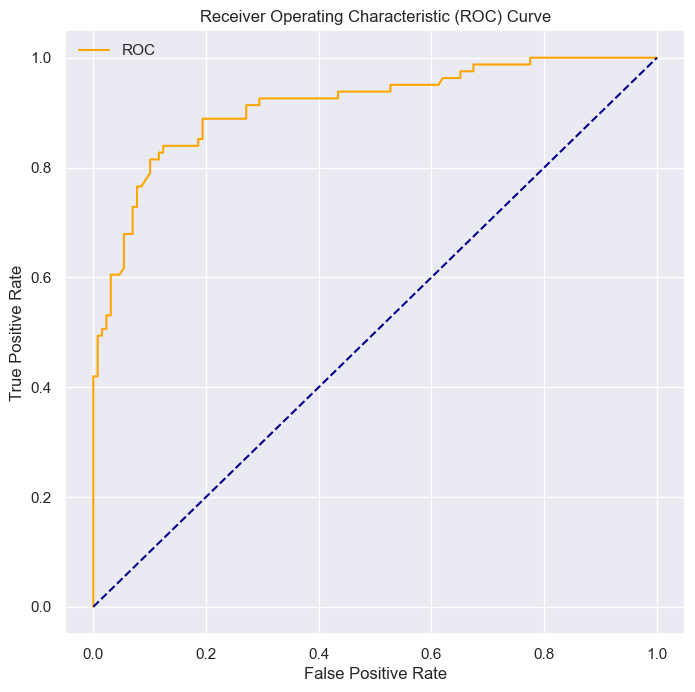

In [168]:

plt.figure(figsize=(8,8))
plot_roc_curve(fpr, tpr)

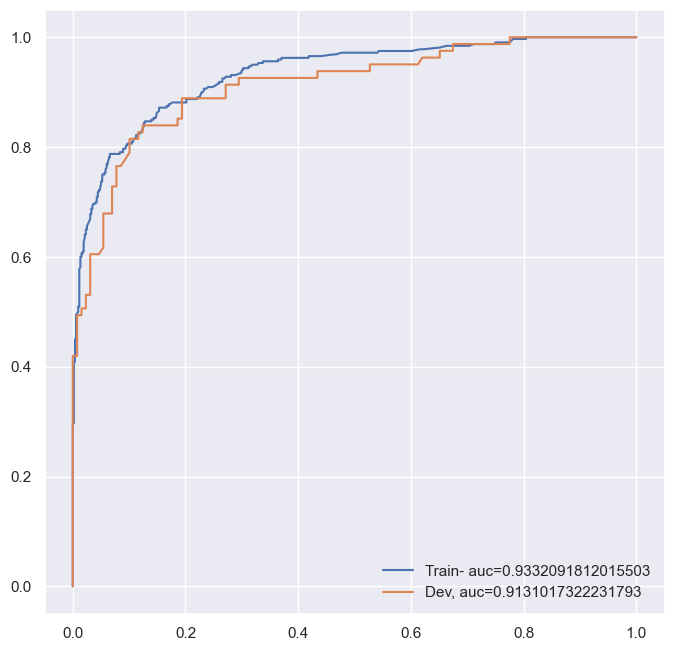

In [169]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

pred = yprob5_tr[:,1]
label = y_train
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Train- auc="+str(auc))

pred = yprob5_ts[:,1]
label = y_dev
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Dev, auc="+str(auc))

plt.legend(loc=0)

### GBM - train measures

In [170]:
acc_train_rf = accuracy_score(y_train,yhat5_tr)
rf_perc_score = precision_score(y_train,yhat5_tr)
rf_rec_score= recall_score(y_train,yhat5_tr)
rf_f1_score = f1_score(y_train,yhat5_tr)

In [171]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_train_rf)

Precision: 0.900
Recall: 0.734
F-measure: 0.809
accuracy_score: 0.867


### GBM - train measures

In [172]:
acc_dev_rf = accuracy_score(y_dev,yhat5_ts)
rf_perc_score = precision_score(y_dev,yhat5_ts)
rf_rec_score= recall_score(y_dev,yhat5_ts)
rf_f1_score = f1_score(y_dev,yhat5_ts)

In [173]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_dev_rf)

Precision: 0.815
Recall: 0.815
F-measure: 0.815
accuracy_score: 0.857


              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88       129
         1.0       0.82      0.80      0.81        81

    accuracy                           0.86       210
   macro avg       0.85      0.85      0.85       210
weighted avg       0.86      0.86      0.86       210



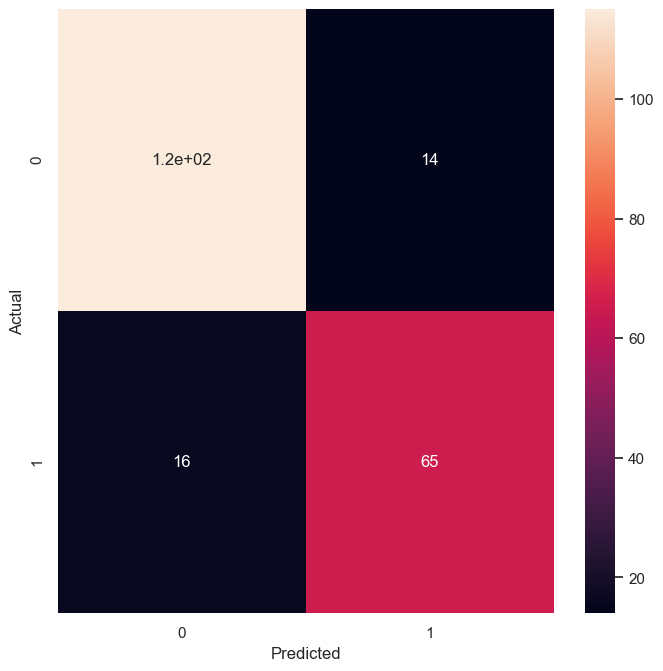

In [174]:
from sklearn.model_selection import GridSearchCV

param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
gcv = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5)
gcv.fit(X_train, y_train)
y_pred_gcv = gcv.predict(X_dev)
confusion_gcv = confusion_matrix(y_dev, gcv.predict(X_dev))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_gcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_dev, y_pred_gcv))


##  XGB

In [175]:
import xgboost as xgb

mod6 = xgb.XGBClassifier()
mod6.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [176]:
yhat6_tr = mod6.predict(X_train)
print(pd.crosstab(y_train,yhat6_tr))
yprob6_tr = mod6.predict_proba(X_train)
print('---------------')
print(mod6.score(X_train,y_train))
print(roc_auc_score(y_train, yprob6_tr[:,1]))

col_0       0    1
survived          
0.0       501   15
1.0        26  294
---------------
0.9509569377990431
0.9914032218992248


In [177]:
yhat6_ts = mod6.predict(X_dev)
print(pd.crosstab(y_dev,yhat6_ts))
yprob6_ts = mod6.predict_proba(X_dev)
print('---------------')
print(mod6.score(X_dev,y_dev))
print(roc_auc_score(y_dev, yprob6_ts[:,1]))

col_0       0   1
survived         
0.0       104  25
1.0        13  68
---------------
0.819047619047619
0.8937218872619389


In [178]:
res[6] = {'model':'XGB',
           'accuracy-Train':mod6.score(X_train,y_train),
           'accuracy-Dev':mod6.score(X_dev,y_dev),
           'AUC-train':roc_auc_score(y_train, yprob6_tr[:,1]),
           'AUC-dev':roc_auc_score(y_dev, yprob6_ts[:,1]),
          'Recall-train':recall_score(y_train,yhat6_tr),
          'Recall-dev':recall_score(y_dev, yhat6_ts),
          'Precision-train':precision_score(y_train,yhat6_tr),
          'Precision-dev':recall_score(y_dev, yhat6_ts),
          'F-measure-train':f1_score(y_train,yhat6_tr),
          'F-measure-dev':f1_score(y_dev, yhat6_ts)
         }

In [179]:
res[6]

{'model': 'XGB',
 'accuracy-Train': 0.9509569377990431,
 'accuracy-Dev': 0.819047619047619,
 'AUC-train': 0.9914032218992248,
 'AUC-dev': 0.8937218872619389,
 'Recall-train': 0.91875,
 'Recall-dev': 0.8395061728395061,
 'Precision-train': 0.9514563106796117,
 'Precision-dev': 0.8395061728395061,
 'F-measure-train': 0.9348171701112878,
 'F-measure-dev': 0.7816091954022988}

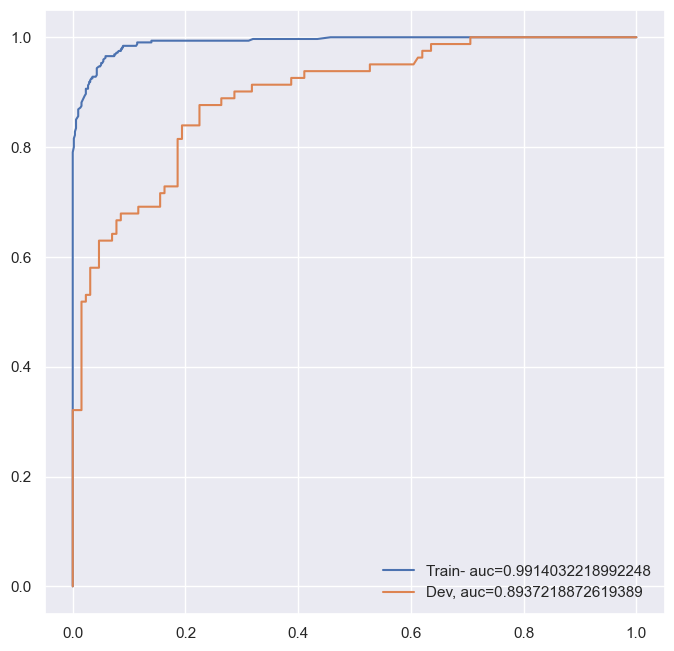

In [180]:

plt.figure(figsize=(8,8))

pred = yprob6_tr[:,1]
label = y_train
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Train- auc="+str(auc))

pred = yprob6_ts[:,1]
label = y_dev
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Dev, auc="+str(auc))

plt.legend(loc=0)

### XGB - train measures

In [181]:
xgb_train_nb = accuracy_score(y_train,yhat6_tr)
xgb_perc_score = precision_score(y_train,yhat6_tr)
xgb_rec_score= recall_score(y_train,yhat6_tr)
xgb_f1_score = f1_score(y_train,yhat6_tr)

In [182]:
print('Precision: %.3f' %xgb_perc_score )
print('Recall: %.3f' % xgb_rec_score)
print('F-measure: %.3f' % xgb_f1_score)
print('accuracy_score: %.3f' % xgb_train_nb)

Precision: 0.951
Recall: 0.919
F-measure: 0.935
accuracy_score: 0.951


### SVM - dev measures

In [183]:
xgb_dev_nb = accuracy_score(y_dev,yhat6_ts)
xgb_perc_score = precision_score(y_dev,yhat6_ts)
xgb_rec_score= recall_score(y_dev,yhat6_ts)
xgb_f1_score = f1_score(y_dev,yhat6_ts)

In [184]:
print('Precision: %.3f' %xgb_perc_score )
print('Recall: %.3f' % xgb_rec_score)
print('F-measure: %.3f' % xgb_f1_score)
print('accuracy_score: %.3f' % xgb_dev_nb)

Precision: 0.731
Recall: 0.840
F-measure: 0.782
accuracy_score: 0.819


# KNeighborsClassifier

In [185]:

from sklearn.neighbors import NearestNeighbors

mod7 = KNeighborsClassifier(n_neighbors = 10)
mod7.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [186]:
yhat7_tr = mod7.predict(X_train)
print(pd.crosstab(y_train,yhat7_tr))
yprob7_tr = mod7.predict_proba(X_train)
print('---------------')
print(mod7.score(X_train,y_train))
print(roc_auc_score(y_train, yprob7_tr[:,1]))

col_0     0.0  1.0
survived          
0.0       473   43
1.0       122  198
---------------
0.8026315789473685
0.8812863372093023


In [187]:
yhat7_ts = mod7.predict(X_dev)
print(pd.crosstab(y_dev,yhat7_ts))
yprob7_ts = mod7.predict_proba(X_dev)
print('---------------')
print(mod7.score(X_dev,y_dev))
print(roc_auc_score(y_dev, yprob7_ts[:,1]))

col_0     0.0  1.0
survived          
0.0       112   17
1.0        22   59
---------------
0.8142857142857143
0.8935304813857785


In [188]:
res[7] = {'model':'KNeighborsClassifier',
           'accuracy-Train':mod7.score(X_train,y_train),
           'accuracy-Dev':mod7.score(X_dev,y_dev),
           'AUC-train':roc_auc_score(y_train, yprob7_tr[:,1]),
           'AUC-dev':roc_auc_score(y_dev, yprob7_ts[:,1]),
          'Recall-train':recall_score(y_train,yhat7_tr),
          'Recall-dev':recall_score(y_dev, yhat7_ts),
          'Precision-train':precision_score(y_train,yhat7_tr),
          'Precision-dev':recall_score(y_dev, yhat7_ts),
          'F-measure-train':f1_score(y_train,yhat7_tr),
          'F-measure-dev':f1_score(y_dev, yhat7_ts)
         }

In [189]:
res[7]

{'model': 'KNeighborsClassifier',
 'accuracy-Train': 0.8026315789473685,
 'accuracy-Dev': 0.8142857142857143,
 'AUC-train': 0.8812863372093023,
 'AUC-dev': 0.8935304813857785,
 'Recall-train': 0.61875,
 'Recall-dev': 0.7283950617283951,
 'Precision-train': 0.8215767634854771,
 'Precision-dev': 0.7283950617283951,
 'F-measure-train': 0.7058823529411764,
 'F-measure-dev': 0.7515923566878981}

In [190]:
fpr, tpr, thresholds = roc_curve(y_dev, yprob7_ts[:,1])

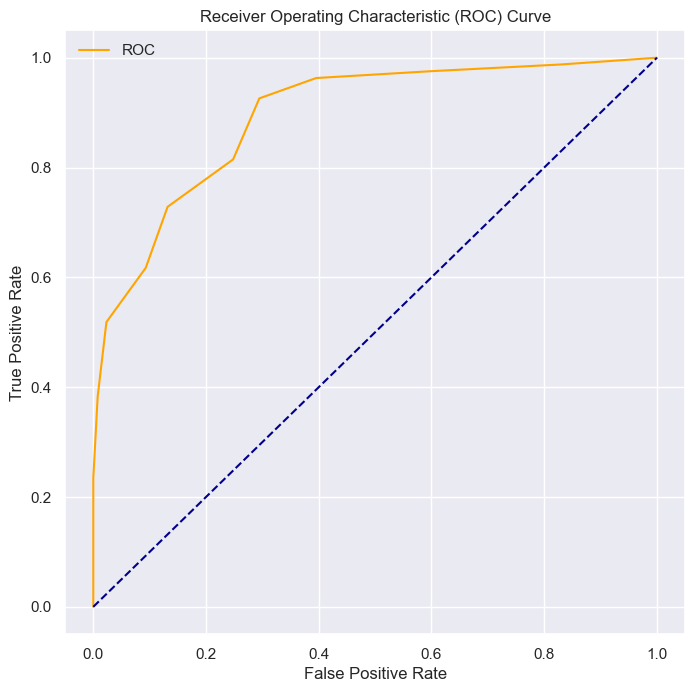

In [191]:
plt.figure(figsize=(8,8))
plot_roc_curve(fpr, tpr)

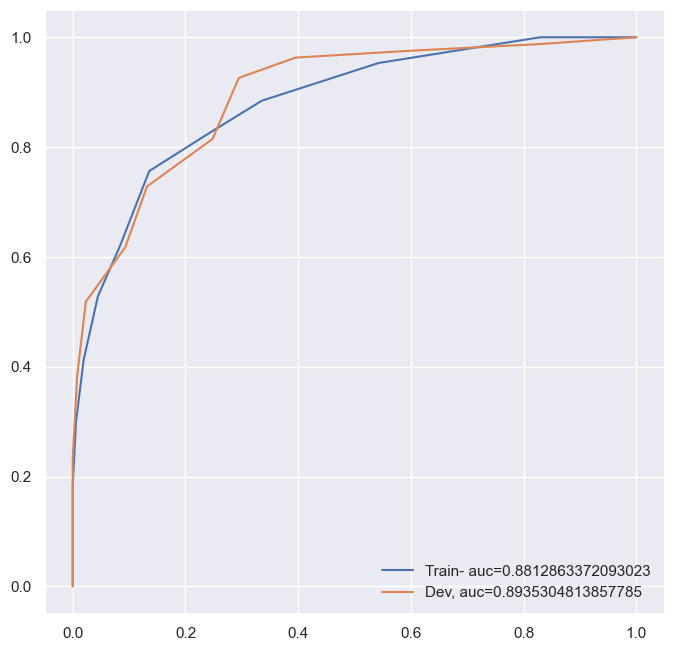

In [192]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

pred = yprob7_tr[:,1]
label = y_train
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Train- auc="+str(auc))

pred = yprob7_ts[:,1]
label = y_dev
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Dev, auc="+str(auc))

plt.legend(loc=0)

### KNN - train measures

In [193]:
acc_train_knn = accuracy_score(y_train,yhat7_tr)
knn_perc_score = precision_score(y_train,yhat7_tr)
knn_rec_score= recall_score(y_train,yhat7_tr)
knn_f1_score = f1_score(y_train,yhat7_tr)

In [194]:
print('Precision: %.3f' %knn_perc_score )
print('Recall: %.3f' % knn_rec_score)
print('F-measure: %.3f' % knn_f1_score)
print('accuracy_score: %.3f' % acc_train_knn)

Precision: 0.822
Recall: 0.619
F-measure: 0.706
accuracy_score: 0.803


### KNN - dev measures

In [195]:
acc_dev_knn = accuracy_score(y_dev,yhat7_ts)
knn_perc_score = precision_score(y_dev,yhat7_ts)
knn_rec_score= recall_score(y_dev,yhat7_ts)
knn_f1_score = f1_score(y_dev,yhat7_ts)

In [196]:
print('Precision: %.3f' %knn_perc_score )
print('Recall: %.3f' % knn_rec_score)
print('F-measure: %.3f' % knn_f1_score)
print('accuracy_score: %.3f' % acc_dev_knn)

Precision: 0.776
Recall: 0.728
F-measure: 0.752
accuracy_score: 0.814


# Model Selection

In [197]:
# Checking best AUC

df_final_AUC = pd.DataFrame.from_dict(res,orient='index').sort_values(by='AUC-dev',ascending=False)

In [198]:
df_final_AUC[['model','AUC-train','AUC-dev']]

model  AUC-train   AUC-dev
5  Gradient Boosting Machine   0.933209  0.913102
1        Logistic Regression   0.840943  0.904441
3              Random Forest   0.995824  0.894200
4                        SVM   0.829188  0.893913
6                        XGB   0.991403  0.893722
7       KNeighborsClassifier   0.881286  0.893530
2              Decision Tree   0.998216  0.774428





<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:left;font-weight: bold;">Gradient Boosting Machine has the highst  AUC - ~0.92</h1>

</div>

In [199]:
# Checking best Accuracy

df_final_accuracy = pd.DataFrame.from_dict(res,orient='index').sort_values(by='accuracy-Dev',ascending=False)

In [200]:
df_final_accuracy[['model','accuracy-Train','accuracy-Dev']]

model  accuracy-Train  accuracy-Dev
5  Gradient Boosting Machine        0.867225      0.857143
1        Logistic Regression        0.796651      0.842857
4                        SVM        0.794258      0.838095
6                        XGB        0.950957      0.819048
7       KNeighborsClassifier        0.802632      0.814286
3              Random Forest        0.972488      0.809524
2              Decision Tree        0.972488      0.761905




<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:left;font-weight: bold;">Gradient Boosting Machine has the highst Accuracy - ~0.86</h1>

</div>

In [201]:
# Checking best Recall

df_final_recall = pd.DataFrame.from_dict(res,orient='index').sort_values(by='Recall-dev',ascending=False)

In [202]:
df_final_recall[['model','Recall-train','Recall-dev']]

model  Recall-train  Recall-dev
1        Logistic Regression      0.700000    0.839506
4                        SVM      0.675000    0.839506
6                        XGB      0.918750    0.839506
3              Random Forest      0.962500    0.814815
5  Gradient Boosting Machine      0.734375    0.814815
2              Decision Tree      0.946875    0.765432
7       KNeighborsClassifier      0.618750    0.728395





<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:left;font-weight: bold;">LR - ~0.84</h1>

</div>

In [203]:
# Checking best F1 measure

df_final_Fmeasure = pd.DataFrame.from_dict(res,orient='index').sort_values(by='F-measure-dev',ascending=False)

In [204]:
df_final_Fmeasure[['model','F-measure-train','F-measure-dev']]

model  F-measure-train  F-measure-dev
5  Gradient Boosting Machine         0.808950       0.814815
1        Logistic Regression         0.724919       0.804734
4                        SVM         0.715232       0.800000
6                        XGB         0.934817       0.781609
3              Random Forest         0.964006       0.767442
7       KNeighborsClassifier         0.705882       0.751592
2              Decision Tree         0.963434       0.712644




<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:left;font-weight: bold;">Gradient Boosting Machine has the highst Recall in dev set - ~0.82</h1>

</div>



<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:##8ca7be;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
    <h1 style="text-align:left;font-weight: bold;">From the results , i will try to hyper tune Gradient Boosting and Logostic regression models - with highst scores
</h1>

           

</div>

### Gradient Boosting Machine hypertuning :

In [205]:
from sklearn.model_selection import RepeatedStratifiedKFold

# a function
model_prams = {}

def model_best_params(estimator, hyperparameters, fit_params={}):
    #sets up a repeated stratified k-fold cross-validation scheme
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Search for the best parameters
    grid_search = GridSearchCV(estimator=estimator, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring="accuracy")
    # fitting the results to the train set
    model_prams = grid_search.fit(X_train, y_train, **fit_params)
    # Checking the best model parameters
    best_parameters = model_prams.best_estimator_.get_params()

    return model_prams

In [206]:

model_hypertun  = GradientBoostingClassifier()

In [207]:
hyperparameters = {
    'loss'          : ['deviance', 'exponential'],
    'learning_rate' : [0.01, 0.1, 0.2, 0.3],
    'n_estimators'  : [50, 100, 200],
    'subsample'     : [0.1, 0.2, 0.5, 1.0],
    'max_depth'     : [2, 3, 4, 5]}


best_model_gbc = model_best_params(model_hypertun, hyperparameters)





In [208]:

print('best_parameters_gbc :',best_model_gbc)

best_parameters_gbc : GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.1, 0.2, 0.5, 1.0]},
             scoring='accuracy')


In [209]:
best_gbc = best_model_gbc.best_estimator_
y_pred = best_gbc.predict(X_train)
print(accuracy_score(y_train,y_pred))

0.8564593301435407


In [210]:
# Function to evaluate the Mean Absolute Error

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mae = 100 * np.mean(errors)
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}'.format(np.mean(errors)))
    return mae

In [211]:
# Base model - logistic regression

base_model = LogisticRegression(random_state=42)
base_model.fit(X_train, y_train)
base_accuracy = base_model.score(X_train,y_train)
base_accuracy = evaluate(base_model, X_dev, y_dev)


Model Performance
Mean Absolute Error: 0.1571


In [212]:
# Best model - Gradiant boosting

best_random = best_model_gbc.best_estimator_
random_accuracy = evaluate(best_random, X_dev, y_dev)


Model Performance
Mean Absolute Error: 0.1476


In [213]:
print('Improvement of {:0.2f}%.'.format( 100 * (base_accuracy - random_accuracy) / base_accuracy))

Improvement of 6.06%.


## Logistic regression hypoer tune

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune and their possible values
param_grid = {'C': [0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}

# Instantiate the logistic regression model
logreg = LogisticRegression(max_iter = 1000)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [215]:
base_model = LogisticRegression(random_state=42)
base_model.fit(X_train, y_train)
base_accuracy = base_model.score(X_train,y_train)
base_accuracy = evaluate(base_model, X_dev, y_dev)

Model Performance
Mean Absolute Error: 0.1571


In [216]:
lr_random = grid_search.best_estimator_
random_accuracy = evaluate(lr_random, X_dev, y_dev)

Model Performance
Mean Absolute Error: 0.1571


In [217]:
print('Improvement of {:0.2f}%.'.format( 100 * (base_accuracy - random_accuracy) / base_accuracy))

Improvement of 0.00%.






<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">LR- Feature Importance</h1>

</div>

Feature: 0, Score: -0.45236  -  age
Feature: 1, Score: 0.23947  -  fare
Feature: 2, Score: -0.06839  -  fare_log
Feature: 3, Score: 0.19665  -  embarked_0.0
Feature: 4, Score: -0.07359  -  embarked_1.0
Feature: 5, Score: -0.27783  -  embarked_2.0
Feature: 6, Score: 0.15442  -  embarked_3.0
Feature: 7, Score: 0.55940  -  parch_0.0
Feature: 8, Score: 0.44975  -  parch_1.0
Feature: 9, Score: 0.01129  -  parch_2.0
Feature: 10, Score: 0.07689  -  parch_3.0
Feature: 11, Score: -0.73022  -  parch_4.0
Feature: 12, Score: -0.36746  -  parch_5.0
Feature: 13, Score: 0.00000  -  parch_9.0
Feature: 14, Score: 0.76761  -  pclass_0.0
Feature: 15, Score: -0.04397  -  pclass_1.0
Feature: 16, Score: -0.72399  -  pclass_2.0
Feature: 17, Score: -0.67576  -  sex_0.0
Feature: 18, Score: 0.67540  -  sex_1.0
Feature: 19, Score: 1.03160  -  sibsp_0.0
Feature: 20, Score: 0.76389  -  sibsp_1.0
Feature: 21, Score: 0.74465  -  sibsp_2.0
Feature: 22, Score: -0.27031  -  sibsp_3.0
Feature: 23, Score: -0.55164  -  si

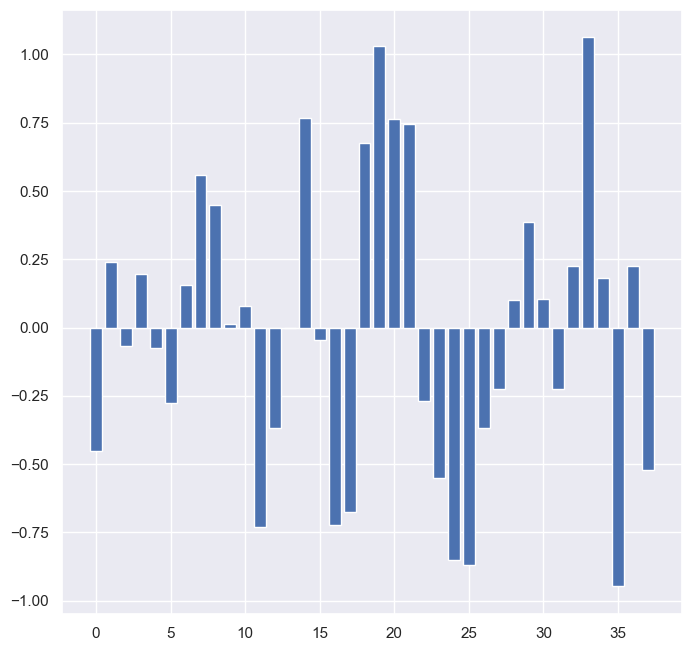

In [218]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define the model
model = LogisticRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    a = X_train.columns
    print('Feature: %0d, Score: %.5f' % (i,v)," - ",a[i] )

# plot feature importance
plt.figure(figsize=(8,8))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()






<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">Final - Prepering Test data set</h1>

</div>

In [219]:
# Change all values from -1 to nan as instructed 

for i in df_test.columns:
    df_test.loc[df_test[i] == -1, i] = np.nan
            

In [220]:
# Change all values from Unknown to nan as instructed 

for i in df_test.columns:
    df_test.loc[df_test[i] == 'Unknown', i] = np.nan
            

In [221]:
# Addning "fare log" feature to test set

df_test['fare_log'] = df_test['fare'].apply(lambda x : np.log(x) if x !=0  else 0)

In [222]:
# Addning age_bin feature to test set

df_test['age_bin']  = pd.cut(df_test['age'], bins=5 , labels=['A','B','C','D','E'])

In [223]:
# extract titles from "title" feature

df_test['title'] = df_test['name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0]

In [224]:
# changing to "Rare" if the title is not ' Mr',' Mrs', ' Miss' or ' Master'

df_test.loc[~df_test['title'].isin([' Mr',' Mrs', ' Miss',' Master']),'title'] = ' Other'


In [225]:
unique_values = df_test['title'].unique()
unique_values

array([' Mr', ' Mrs', ' Master', ' Miss', ' Other'], dtype=object)

In [226]:
# checking the "Othe" title

df_check_other_title = df_test.groupby(['title','survived','embarked','pclass','parch'])['survived'].count().to_frame()


In [227]:
df_check_other_title['survived'].tail(11)

title   survived  embarked  pclass  parch
 Mrs    1.0       2.0       0.0     1.0      3
                            1.0     0.0      4
                                    1.0      4
                                    2.0      3
                            2.0     0.0      1
                                    1.0      3
                                    2.0      1
 Other  0.0       1.0       0.0     0.0      1
                  2.0       0.0     0.0      2
        1.0       0.0       0.0     0.0      3
                  2.0       0.0     0.0      1
Name: survived, dtype: int64

### from the "Other" titles, 4 from 7 survived, 3 women and 1 man , all traveleed alone. 3 of them from embark 0.

In [228]:
# Addning age_bin feature to test set

df_test['Is_Married'] = np.where(df_test['title'] == ' Mrs', 1, 0)


In [229]:
# filling missing values in 'age' feature with knn imputation

from sklearn.impute import KNNImputer


# fill with KNN

imputer = KNNImputer(n_neighbors=5)
df_test[['age']] = imputer.fit_transform(df_test[['age']])



In [230]:
df_test['age'] = round(df_test['age'],1)

In [231]:
df_test.head()

age boat   body        cabin  embarked      fare  \
670   64.0  NaN  263.0          NaN       2.0   26.0000   
251   48.0   14    NaN          NaN       2.0   36.7500   
1225  35.0  NaN    NaN          NaN       1.0   12.3500   
300   19.0  NaN    NaN  C23 C25 C27       2.0  263.0000   
352    4.0   15    NaN          NaN       2.0   11.1333   

                            home.dest  \
670            Isle of Wight, England   
251   St Ives, Cornwall / Hancock, MI   
1225                              NaN   
300                      Winnipeg, MB   
352                               NaN   

                                                   name  parch  pclass  sex  \
670                        Nicholson, Mr. Arthur Ernest    0.0     0.0  0.0   
251   Davies, Mrs. John Morgan (Elizabeth Agnes Mary...    2.0     1.0  1.0   
1225                                  Keane, Mr. Daniel    0.0     1.0  0.0   
300                      Fortune, Mr. Charles Alexander    2.0     0.0  0.0   
352                     Johnson, Master. Harold Theodor    1.0     2.0  0.0   

      sibsp  survived      ticket  fare_log age_bin    title  Is_Married  
670     0.0       0.0         693  3.258097       E       Mr           0  
251     0.0       1.0  C.A. 33112  3.604138       D      Mrs           1  
1225    0.0       0.0      233734  2.513656       C       Mr           0  
300     3.0       0.0       19950  5.572154       B       Mr           0  
352     1.0       1.0      347742  2.409941       A   Master           0

In [232]:
# choosing the feature in th test set df

df_test = df_test[['age', 'embarked', 'fare', 'parch', 'pclass', 'sex', 'sibsp',
                   'title', 'fare_log', 'age_bin', 'Is_Married','survived']]

In [233]:

#analyzing the dataset
advert_report = sv.analyze([df_test,'Test'],target_feat='survived',pairwise_analysis='off')
#display the report
advert_report.show_html('df_test.html')

                                             |                                                                …

Report df_test.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Scaling numerical variables

In [234]:
# Scaling between -1 and 1. Good practice for continuous variables

from sklearn import preprocessing

for col in ['age','fare','fare_log']:
    transf = df_test[col].values.reshape(-1,1)
    scaler = preprocessing.StandardScaler().fit(transf)
    df_test[col] = scaler.transform(transf)

# Label encoder

In [235]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Fit and transform the column
df_test['title'] = le.fit_transform(df_test['title'])
df_test['age_bin'] = le.fit_transform(df_test['age_bin'])

# One hot encoding - categorial variables

In [236]:
# one hot encoding all the categories data and getting final dataset

df_test=pd.get_dummies(df_test, columns=['embarked','parch','pclass','sex','sibsp','age_bin','Is_Married','title'])


In [237]:
df_test.head()

age      fare  fare_log  survived  embarked_0.0  embarked_1.0  \
670   2.745966 -0.209229  0.246772       0.0             0             0   
251   1.418259 -0.045462  0.564676       1.0             0             0   
1225  0.339497 -0.417174 -0.437136       0.0             0             1   
300  -0.988211  3.401247  2.372666       0.0             0             0   
352  -2.232937 -0.435709 -0.532418       1.0             0             0   

      embarked_2.0  parch_0.0  parch_1.0  parch_2.0  ...  age_bin_3  \
670              1          1          0          0  ...          0   
251              1          0          0          1  ...          1   
1225             0          1          0          0  ...          0   
300              1          0          0          1  ...          0   
352              1          0          1          0  ...          0   

      age_bin_4  age_bin_5  Is_Married_0  Is_Married_1  title_0  title_1  \
670           1          0             1             0        0        0   
251           0          0             0             1        0        0   
1225          0          0             1             0        0        0   
300           0          0             1             0        0        0   
352           0          0             1             0        1        0   

      title_2  title_3  title_4  
670         1        0        0  
251         0        1        0  
1225        1        0        0  
300         1        0        0  
352         0        0        0  

[5 rows x 39 columns]

In [238]:
X_train.shape

(836, 38)

In [239]:
# Selecting X and y

X_test = df_test.drop('survived',axis=1)
y_test = df_test['survived'].copy()

In [240]:
X_test.shape

(262, 38)

In [241]:
# In order to have same columns after get dumies, need to run the below:

X_test = X_test.reindex(columns = X_train.columns, fill_value=0)
 
X_test

age      fare  fare_log  embarked_0.0  embarked_1.0  embarked_2.0  \
670   2.745966 -0.209229  0.246772             0             0             1   
251   1.418259 -0.045462  0.564676             0             0             1   
1225  0.339497 -0.417174 -0.437136             0             1             0   
300  -0.988211  3.401247  2.372666             0             0             1   
352  -2.232937 -0.435709 -0.532418             0             0             1   
...        ...       ...       ...           ...           ...           ...   
1240 -0.739266 -0.482680 -0.830320             0             0             1   
1068  2.331058  0.178923  0.874310             0             0             1   
669   1.584222  3.165436  2.316939             1             0             0   
621  -0.822247 -0.486489 -0.859303             0             0             1   
1305 -0.988211 -0.486870 -0.862252             0             0             1   

      embarked_3.0  parch_0.0  parch_1.0  parch_2.0  ...  age_bin_2  \
670              0          1          0          0  ...          0   
251              0          0          0          1  ...          0   
1225             0          1          0          0  ...          1   
300              0          0          0          1  ...          0   
352              0          0          1          0  ...          0   
...            ...        ...        ...        ...  ...        ...   
1240             0          1          0          0  ...          0   
1068             0          1          0          0  ...          0   
669              0          0          1          0  ...          0   
621              0          1          0          0  ...          0   
1305             0          1          0          0  ...          0   

      age_bin_3  age_bin_4  Is_Married_0  Is_Married_1  title_0  title_1  \
670           0          1             1             0        0        0   
251           1          0             0             1        0        0   
1225          0          0             1             0        0        0   
300           0          0             1             0        0        0   
352           0          0             1             0        1        0   
...         ...        ...           ...           ...      ...      ...   
1240          0          0             1             0        0        0   
1068          0          1             0             1        0        0   
669           1          0             0             1        0        0   
621           0          0             1             0        0        0   
1305          0          0             1             0        0        0   

      title_2  title_3  title_4  
670         1        0        0  
251         0        1        0  
1225        1        0        0  
300         1        0        0  
352         0        0        0  
...       ...      ...      ...  
1240        1        0        0  
1068        0        1        0  
669         0        1        0  
621         1        0        0  
1305        1        0        0  

[262 rows x 38 columns]

In [242]:
X_test.shape

(262, 38)







<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:left;font-weight: bold;"> Checking LR , GB and RF models on test set to see the best results</h1>

</div>

### prediction with base logistic regression model

In [243]:
seed = 42

base_model_ts = mod1.predict(X_test)
print(pd.crosstab(y_test,base_model_ts))
yprob_base_model_ts = mod1.predict_proba(X_test)
lr_accuracy_score = accuracy_score(y_test,base_model_ts)
lr_perc_score = precision_score(y_test,base_model_ts)
lr_rec_score= recall_score(y_test,base_model_ts)
lr_f1_score = f1_score(y_test,base_model_ts)
lr_auc_score = roc_auc_score(y_test,yprob_base_model_ts[:,1])
print('---------------')
print('Accuracy: %.3f' % lr_accuracy_score)
print('Precision: %.3f' %lr_perc_score )
print('Recall: %.3f' % lr_rec_score)
print('F-measure: %.3f' % lr_f1_score)
print('AUC: %.3f' % lr_auc_score)

col_0     0.0  1.0
survived          
0.0       136   27
1.0        19   80
---------------
Accuracy: 0.824
Precision: 0.748
Recall: 0.808
F-measure: 0.777
AUC: 0.881


### prediction with hyper tuned  Logistic regression model:

In [244]:
# prediction with test set and Gradiant boosting best params


seed = 42

best_model_lr = grid_search.best_estimator_.predict(X_test)
print(pd.crosstab(y_test,best_model_lr))
yprob_best_model_ts = mod5.predict_proba(X_test)
lr_accuracy_score = accuracy_score(y_test,best_model_lr)
lr_perc_score = precision_score(y_test,best_model_lr)
lr_rec_score= recall_score(y_test,best_model_lr)
lr_f1_score = f1_score(y_test,best_model_lr)
lr_auc_score = roc_auc_score(y_test, yprob_best_model_ts[:,1])
print('---------------')
print('Accuracy: %.3f' % lr_accuracy_score)
print('Precision: %.3f' %lr_perc_score )
print('Recall: %.3f' % lr_rec_score)
print('F-measure: %.3f' % lr_f1_score)
print('AUC: %.3f' % lr_auc_score)



col_0     0.0  1.0
survived          
0.0       136   27
1.0        18   81
---------------
Accuracy: 0.828
Precision: 0.750
Recall: 0.818
F-measure: 0.783
AUC: 0.869


### We see that the base LR results are better :  AUC: ~0.88

 ## Prediction with base Random forest model:

In [245]:
# prediction with test set and base Random Forest
seed = 42

best_model_ts = mod3.predict(X_test)
print(pd.crosstab(y_test,best_model_ts))
yprob_best_model_ts = mod3.predict_proba(X_test)
rf_accuracy_score = accuracy_score(y_test,best_model_ts)
rf_perc_score = precision_score(y_test,best_model_ts)
rf_rec_score= recall_score(y_test,best_model_ts)
rf_f1_score = f1_score(y_test,best_model_ts)
rf_auc_score = roc_auc_score(y_test,yprob_best_model_ts[:,1])
print('---------------')
print('Accuracy: %.3f' % rf_accuracy_score)
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('AUC: %.3f' % rf_auc_score)

col_0     0.0  1.0
survived          
0.0       148   15
1.0        31   68
---------------
Accuracy: 0.824
Precision: 0.819
Recall: 0.687
F-measure: 0.747
AUC: 0.854


### prediction with base Gradiant boosting model:

In [246]:
# prediction with test set and base GB 

seed = 42

best_model_ts = mod5.predict(X_test)
print(pd.crosstab(y_test,best_model_ts))
yprob_best_model_ts = mod5.predict_proba(X_test)
gbc_accuracy_score = accuracy_score(y_test,best_model_ts)
gbc_perc_score = precision_score(y_test,best_model_ts)
gbc_rec_score= recall_score(y_test,best_model_ts)
gbc_f1_score = f1_score(y_test,best_model_ts)
gbc_auc_score = roc_auc_score(y_test,yprob_best_model_ts[:,1])
print('---------------')
print('Accuracy: %.3f' % gbc_accuracy_score)
print('Precision: %.3f' %gbc_perc_score )
print('Recall: %.3f' % gbc_rec_score)
print('F-measure: %.3f' % gbc_f1_score)
print('AUC: %.3f' % gbc_auc_score)

col_0     0.0  1.0
survived          
0.0       142   21
1.0        27   72
---------------
Accuracy: 0.817
Precision: 0.774
Recall: 0.727
F-measure: 0.750
AUC: 0.869


### prediction with best Gradiant boosting model:

In [247]:
# prediction with test set and Gradiant boosting best params


seed = 42

best_model_ts = best_model_gbc.best_estimator_.predict(X_test)
print(pd.crosstab(y_test,best_model_ts))
yprob_best_model_ts = mod5.predict_proba(X_test)
gbc_accuracy_score = accuracy_score(y_test,best_model_ts)
gbc_perc_score = precision_score(y_test,best_model_ts)
gbc_rec_score= recall_score(y_test,best_model_ts)
gbc_f1_score = f1_score(y_test,best_model_ts)
gbc_auc_score = roc_auc_score(y_test,yprob_best_model_ts[:,1])
print('---------------')
print('Accuracy: %.3f' % gbc_accuracy_score)
print('Precision: %.3f' %gbc_perc_score )
print('Recall: %.3f' % gbc_rec_score)
print('F-measure: %.3f' % gbc_f1_score)
print('AUC: %.3f' % gbc_auc_score)



col_0     0.0  1.0
survived          
0.0       143   20
1.0        26   73
---------------
Accuracy: 0.824
Precision: 0.785
Recall: 0.737
F-measure: 0.760
AUC: 0.869


## we want the model with the highest :
- AUC (Area Under Curve) - metric used to evaluate the performance of a binary classification model. 
- Recall- ratio of the number of true positive predictions to the number of true positives plus the number of false negatives. A high recall value indicates that the classifier has a low number of false negatives.




<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:##8ca7be;
           color:purple;
            padding:5px 5px 5px 5px;
           ">
    <h1 style="text-align:center;font-weight: bold;">Best results for Logistic regression model:- AUC: ~0.88 !!
</h1>

           

</div>


* Accuracy: ~0.83
* Precision: ~0.75
* Recall: ~0.~81
* F-measure: 0.78
* AUC: 0.88




           



<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">Methodology ​(Project Design)</h1>

</div>



## Data

##### Time frames periods the project based on

* Load data set
* Data Exploritory (EDA).
* Missinf values and treatment
* Outliers and treatment
* Feature engineering.
* One hot encoding(categorial variables), Label encoding and scaling( for numeracl variables)
* Running models
* Evaluate the model performance using validation score.
* Choosing the best model
* Hyper parameter tunning.
* Re-evaluate the model performance and get final validation score.
* Predict test data and submit.

#### Data used:
The data comes from titenic train and test csv files

#### Outcome variable?  

<font color='blue'>'survived':</font> feature is our outcome. can have two values: 1 or 0.(Binary classification)

##### Data exploration strategy: 

* Check each of the variable statistics

* Distribution of variables and Relationship with the outcome
    
* Correlation for Numeric Variables
    

* Missing Values-Making desicions about the mechanism of missingness1
    
* Outliers Check -Desiding which values could be droped and which not
       

##### Techniques  applied to enrich the data:


* Label encoding for categorial features 

* Scaling numerical features 

* Ont Hot Encoding- Get dummies


##### Missing values treatment:


* For 'age' missing values, i used KNN imputation techniques


##### Outliers treatment:

* For 'age' feature , i replaced  the outliers using 3*IQR
* For 'fare' feature , i replaced the outliers using 1*IQR


#### Models used:
*   Logistic Regression	
*	SVM	
*	XGB	
*	Decision Tree	
*	Random Forest	
*	Gradient Boosting Machine	
*	KNeighborsClassifier


#### Metrics used:

* Accuracy
* AUC
* Recall
* Precision
* F-measure


